> **⚠️ IMPORTANT: How to Run This Notebook**
>
> 1. **Restart Kernel**: Click "Restart" in the kernel menu
> 2. **Run All Cells in Order**: Click "Run All" or run cells sequentially from top to bottom
> 3. **Do NOT re-run individual cells** after the notebook is complete (especially preprocessing and encoding cells)
>
> **Why?** Once the data is encoded (department → department_sales, department_IT, etc.), you cannot run that cell again without restarting.

# Machine Learning with Employee Dataset
> **Employee Turnover Prediction**

> ***Importing necessary Libraries***

In [1]:
import warnings
warnings.filterwarnings("ignore")

**What this does:** 
This code suppresses warning messages that might appear during execution. It keeps the output clean and easy to read.

**Essential Libraries - Must included**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**What this does:**
- **numpy**: For numerical computations and array operations
- **pandas**: For data manipulation and analysis (reading CSV, creating DataFrames)
- **matplotlib & seaborn**: For data visualization (though we're not using plots in this notebook)

**Libraries for Data Pre-Processing**

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

**What this does:**
- **StandardScaler**: Normalizes features to have mean=0 and standard deviation=1
- **LabelEncoder**: Converts categorical text data (department, salary) into numbers
- **train_test_split**: Splits data into training set (80%) and testing set (20%)

In [4]:
# Classification Models (for predicting categories: Stay=0 or Quit=1)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**What this does:**
Imports various **classification** algorithms to predict binary outcomes (Stay=0 or Quit=1):
- **Logistic Regression**: Simple probabilistic classifier
- **Decision Tree**: Tree-based decision making
- **Random Forest**: Ensemble of decision trees (often very accurate)
- **Gradient Boosting**: Sequential boosting algorithm (high performance)
- **K-Nearest Neighbors (KNN)**: Classifies based on similarity to nearby data points

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

**What this does:**
Imports evaluation metrics to measure classification model performance:
- **Accuracy**: Percentage of correct predictions (overall correctness)
- **Precision**: Of predicted quits, how many actually quit (minimize false alarms)
- **Recall**: Of actual quits, how many we predicted (catch all quitters)
- **F1 Score**: Harmonic mean of precision and recall (balanced metric)

> **loading/importing dataset**

In [6]:
import pandas as pd
employee_data = pd.read_csv('employee_data.csv')

**What this does:**
Loads the employee dataset from CSV file into a pandas DataFrame for analysis.

> **EDA : Exploratory Data Analysis**

In [7]:
employee_data.shape

(11582, 10)

**What this does:**
Shows the dimensions of the dataset (number of rows × number of columns).

In [8]:
print(employee_data.shape)
print(employee_data.index)
print(employee_data.columns)
print(len(employee_data.columns))

(11582, 10)
RangeIndex(start=0, stop=11582, step=1)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')
10


**What this does:**
Displays detailed information about the dataset: shape, index, column names, and total number of columns.

In [9]:
employee_data.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157.0,3,0,1,0.0,sales,low
1,0.80,0.86,five,262.0,6,0,1,0.0,sales,medium
2,0.11,0.88,seven,272.0,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223.0,5,0,1,0.0,sales,low
4,0.37,0.52,2,159.0,3,0,1,0.0,sales,low


**What this does:**
Shows the first 5 rows of the dataset to understand its structure and content.

In [10]:
employee_data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
11577,0.55,0.78,4,261.0,3,0,0,0.0,management,high
11578,0.76,0.56,5,222.0,10,0,0,0.0,management,high
11579,0.53,0.99,3,223.0,10,0,0,0.0,marketing,low
11580,0.51,0.86,3,182.0,10,0,0,0.0,sales,low
11581,0.57,0.93,2,204.0,10,0,0,NaN,NaN,NaN


**What this does:**
Shows the last 5 rows of the dataset.

In [11]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11582 non-null  float64
 1   last_evaluation        11582 non-null  float64
 2   number_project         11582 non-null  object 
 3   average_montly_hours   11529 non-null  float64
 4   time_spend_company     11550 non-null  object 
 5   Work_accident          11582 non-null  int64  
 6   quit                   11582 non-null  int64  
 7   promotion_last_5years  11581 non-null  float64
 8   department             11560 non-null  object 
 9   salary                 11546 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 905.0+ KB


**What this does:**
Provides detailed information about each column: data type, number of non-null values, and memory usage.

In [12]:
employee_data.describe()

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,quit,promotion_last_5years
count,11582.000000,11582.000000,11529.000000,11582.000000,11582.000000,11581.000000
mean,0.628308,0.716608,200.482609,0.152651,0.172682,0.013816
std,0.241985,0.168828,48.841773,0.359666,0.377988,0.116731
min,0.090000,0.360000,96.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,157.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,200.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,243.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,310.000000,1.000000,1.000000,1.000000


**What this does:**
Shows statistical summary of numerical columns: count, mean, std, min, 25%, 50%, 75%, max values.

In [13]:
print(employee_data['satisfaction_level'].describe())

count    11582.000000
mean         0.628308
std          0.241985
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


**What this does:**
Shows detailed statistics specifically for the 'satisfaction_level' column.

In [14]:
print(employee_data['last_evaluation'].describe())

count    11582.000000
mean         0.716608
std          0.168828
min          0.360000
25%          0.570000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64


In [15]:
print(employee_data['average_montly_hours'].describe())

count    11529.000000
mean       200.482609
std         48.841773
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64



In [16]:
employee_data.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11577,False,False,False,False,False,False,False,False,False,False
11578,False,False,False,False,False,False,False,False,False,False
11579,False,False,False,False,False,False,False,False,False,False
11580,False,False,False,False,False,False,False,False,False,False


**What this does:**
Creates a boolean DataFrame showing True for missing values and False for present values.

In [17]:
employee_data.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours     53
time_spend_company       32
Work_accident             0
quit                      0
promotion_last_5years     1
department               22
salary                   36
dtype: int64

**What this does:**
Counts the total number of missing values in each column.

In [18]:
employee_data['department'].value_counts()

department
sales          3086
technical      2221
support        1790
IT              931
RandD           689
product_mng     636
marketing       632
accounting      610
hr              600
management      365
Name: count, dtype: int64

**What this does:**
Counts how many employees are in each department.

In [19]:
print(employee_data['department'].unique().tolist())
print(employee_data['department'].value_counts().tolist())

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD', nan]
[3086, 2221, 1790, 931, 689, 636, 632, 610, 600, 365]


In [20]:
employee_data['salary'].value_counts()

salary
low       5564
medium    5085
high       897
Name: count, dtype: int64

In [21]:
print(employee_data['salary'].unique().tolist())
print(employee_data['salary'].value_counts().tolist())

['low', 'medium', 'high', nan]
[5564, 5085, 897]


In [22]:
employee_data['quit'].value_counts()

quit
0    9582
1    2000
Name: count, dtype: int64

In [23]:
print(employee_data['quit'].unique().tolist())
print(employee_data['quit'].value_counts().tolist())

[1, 0]
[9582, 2000]


> # ⚠️ Imbalanced Dataset Detected!

**Problem:**
- **Stay (0)**: 9,582 employees (82.8%)
- **Quit (1)**: 2,000 employees (17.2%)

**Why this is a problem:**
- Models tend to predict the majority class ("STAY") all the time
- May achieve high accuracy (83%) by just predicting "STAY" for everyone
- Poor at identifying the minority class (quitters) - which is what we actually care about!

**Solutions to Balance the Dataset:**
1. **Random Oversampling** - Duplicate minority class samples
2. **Random Undersampling** - Reduce majority class samples
3. **SMOTE** (Synthetic Minority Over-sampling Technique) - Create synthetic minority samples
4. **Class Weights** - Give more importance to minority class during training

We'll implement all 4 approaches and compare results!

In [24]:
# Visualize the imbalance
import numpy as np

class_counts = employee_data['quit'].value_counts()
total = len(employee_data)

print("=" * 60)
print("CLASS DISTRIBUTION ANALYSIS")
print("=" * 60)
print(f"\nTotal Employees: {total:,}")
print(f"\nStay (0): {class_counts[0]:,} ({class_counts[0]/total*100:.2f}%)")
print(f"Quit (1): {class_counts[1]:,} ({class_counts[1]/total*100:.2f}%)")
print(f"\nImbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")
print(f"  (For every 1 quitter, there are {class_counts[0]/class_counts[1]:.1f} employees who stay)")

# Visual representation
print("\n📊 Visual Distribution:")
print(f"Stay (0): {'█' * int(class_counts[0]/total*100)} {class_counts[0]/total*100:.1f}%")
print(f"Quit (1): {'█' * int(class_counts[1]/total*100)} {class_counts[1]/total*100:.1f}%")

print("\n⚠️  This is a SEVERELY IMBALANCED dataset!")
print("    Models may achieve 83% accuracy by just predicting 'STAY' for everyone.")
print("=" * 60)

CLASS DISTRIBUTION ANALYSIS

Total Employees: 11,582

Stay (0): 9,582 (82.73%)
Quit (1): 2,000 (17.27%)

Imbalance Ratio: 4.79:1
  (For every 1 quitter, there are 4.8 employees who stay)

📊 Visual Distribution:
Stay (0): ██████████████████████████████████████████████████████████████████████████████████ 82.7%
Quit (1): █████████████████ 17.3%

⚠️  This is a SEVERELY IMBALANCED dataset!
    Models may achieve 83% accuracy by just predicting 'STAY' for everyone.


# ***Data PreProcessing***

> # Examining and Handeling Missing Values

**What this does:**
1. **Converts columns to numeric type** - Ensures numerical columns are numbers (not text)
2. **Fills ALL missing values** with appropriate replacements:
   - **Numerical columns**: Filled with mean (average value)
   - **Categorical columns**: Filled with mode (most common value)

**IMPORTANT**: This must be done BEFORE label encoding and feature engineering to ensure no NaN values remain.

In [25]:
# Handle missing values BEFORE feature engineering
# Convert numeric columns to numeric type (in case they were read as objects)
employee_data['satisfaction_level'] = pd.to_numeric(employee_data['satisfaction_level'], errors='coerce')
employee_data['last_evaluation'] = pd.to_numeric(employee_data['last_evaluation'], errors='coerce')
employee_data['number_project'] = pd.to_numeric(employee_data['number_project'], errors='coerce')
employee_data['average_montly_hours'] = pd.to_numeric(employee_data['average_montly_hours'], errors='coerce')
employee_data['time_spend_company'] = pd.to_numeric(employee_data['time_spend_company'], errors='coerce')
employee_data['Work_accident'] = pd.to_numeric(employee_data['Work_accident'], errors='coerce')
employee_data['quit'] = pd.to_numeric(employee_data['quit'], errors='coerce')
employee_data['promotion_last_5years'] = pd.to_numeric(employee_data['promotion_last_5years'], errors='coerce')

# Fill missing numerical values with mean
employee_data['satisfaction_level'].fillna(employee_data['satisfaction_level'].mean(), inplace=True)
employee_data['last_evaluation'].fillna(employee_data['last_evaluation'].mean(), inplace=True)
employee_data['average_montly_hours'].fillna(employee_data['average_montly_hours'].mean(), inplace=True)
employee_data['time_spend_company'].fillna(employee_data['time_spend_company'].mean(), inplace=True)

# Fill missing integer columns with mode (most common value)
if not employee_data['number_project'].mode().empty:
    employee_data['number_project'].fillna(employee_data['number_project'].mode()[0], inplace=True)
else:
    employee_data['number_project'].fillna(0, inplace=True)

if not employee_data['Work_accident'].mode().empty:
    employee_data['Work_accident'].fillna(employee_data['Work_accident'].mode()[0], inplace=True)
else:
    employee_data['Work_accident'].fillna(0, inplace=True)

if not employee_data['quit'].mode().empty:
    employee_data['quit'].fillna(employee_data['quit'].mode()[0], inplace=True)
else:
    employee_data['quit'].fillna(0, inplace=True)

if not employee_data['promotion_last_5years'].mode().empty:
    employee_data['promotion_last_5years'].fillna(employee_data['promotion_last_5years'].mode()[0], inplace=True)
else:
    employee_data['promotion_last_5years'].fillna(0, inplace=True)

# Fill missing categorical columns with mode - ONLY if column still exists
if 'department' in employee_data.columns and not employee_data['department'].mode().empty:
    employee_data['department'].fillna(employee_data['department'].mode()[0], inplace=True)

if 'salary' in employee_data.columns and not employee_data['salary'].mode().empty:
    employee_data['salary'].fillna(employee_data['salary'].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(employee_data.isnull().sum())
print("\nData types after conversion:")
print(employee_data.dtypes)


Missing values after handling:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Data types after conversion:
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object


**What this does:**
Checks for missing values in the dataset. Shows data types (object = text, int64 = integer, float64 = decimal numbers)

In [26]:
# Check for any missing values
print("Missing values before handling:")
print(employee_data.isnull().sum())
print("\nData types:")
print(employee_data.dtypes)

Missing values before handling:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Data types:
satisfaction_level       float64
last_evaluation          float64
number_project           float64
average_montly_hours     float64
time_spend_company       float64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object


In [27]:
employee_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0,1,0.0,sales,low
1,0.80,0.86,4.0,262.0,6.0,0,1,0.0,sales,medium
2,0.11,0.88,4.0,272.0,4.0,0,1,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0,1,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0,1,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4.0,261.0,3.0,0,0,0.0,management,high
11578,0.76,0.56,5.0,222.0,10.0,0,0,0.0,management,high
11579,0.53,0.99,3.0,223.0,10.0,0,0,0.0,marketing,low
11580,0.51,0.86,3.0,182.0,10.0,0,0,0.0,sales,low


**What this does:**
Displays the entire dataset to verify the data before preprocessing.

In [28]:
employee_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

> # Feature Engineering

In [29]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
employee_data.salary = le.fit_transform(employee_data.salary) 
 
employee_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0,1,0.0,sales,1
1,0.80,0.86,4.0,262.0,6.0,0,1,0.0,sales,2
2,0.11,0.88,4.0,272.0,4.0,0,1,0.0,sales,2
3,0.72,0.87,5.0,223.0,5.0,0,1,0.0,sales,1
4,0.37,0.52,2.0,159.0,3.0,0,1,0.0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4.0,261.0,3.0,0,0,0.0,management,0
11578,0.76,0.56,5.0,222.0,10.0,0,0,0.0,management,0
11579,0.53,0.99,3.0,223.0,10.0,0,0,0.0,marketing,1
11580,0.51,0.86,3.0,182.0,10.0,0,0,0.0,sales,1


**What this does:**
Converts categorical text values to numbers:
- **salary**: 'low' → 0, 'medium' → 1, 'high' → 2 (or similar encoding)

Machine learning models only work with numbers, not text.

In [30]:
cols=['department']
employee_data=pd.get_dummies(employee_data, columns = cols) 
employee_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0,1,0.0,1,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,4.0,262.0,6.0,0,1,0.0,2,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,4.0,272.0,4.0,0,1,0.0,2,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5.0,223.0,5.0,0,1,0.0,1,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2.0,159.0,3.0,0,1,0.0,1,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4.0,261.0,3.0,0,0,0.0,0,False,False,False,False,True,False,False,False,False,False
11578,0.76,0.56,5.0,222.0,10.0,0,0,0.0,0,False,False,False,False,True,False,False,False,False,False
11579,0.53,0.99,3.0,223.0,10.0,0,0,0.0,1,False,False,False,False,False,True,False,False,False,False
11580,0.51,0.86,3.0,182.0,10.0,0,0,0.0,1,False,False,False,False,False,False,False,True,False,False


**What this does:**
Converts the 'department' column into separate binary columns:
- Creates: department_sales, department_accounting, department_hr, department_technical, etc.
- Each row has 1 in its department column and 0 in others
- Example: sales → [1, 0, 0, 0, ...]

In [31]:
# Get all department columns
dept_columns = [col for col in employee_data.columns if col.startswith('department_')]
print(f"Department columns: {dept_columns}")

# Encode all department columns
for col in dept_columns:
    employee_data[col] = le.fit_transform(employee_data[col])
    
employee_data

Department columns: ['department_IT', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0,1,0.0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,4.0,262.0,6.0,0,1,0.0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,4.0,272.0,4.0,0,1,0.0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5.0,223.0,5.0,0,1,0.0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2.0,159.0,3.0,0,1,0.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4.0,261.0,3.0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0
11578,0.76,0.56,5.0,222.0,10.0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0
11579,0.53,0.99,3.0,223.0,10.0,0,0,0.0,1,0,0,0,0,0,1,0,0,0,0
11580,0.51,0.86,3.0,182.0,10.0,0,0,0.0,1,0,0,0,0,0,0,0,1,0,0


**What this does:**
Ensures all department columns contain only 0s and 1s (converts True/False to 1/0 if needed).

> # Feature Selection 
> **With Domain Expertise**

In [32]:
# Drop one department column to avoid multicollinearity
if 'department_sales' in employee_data.columns:
    employee_data.drop(['department_sales'],axis=1,inplace=True)
elif len(dept_columns) > 0:
    employee_data.drop([dept_columns[0]],axis=1,inplace=True)
    
employee_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_support,department_technical
0,0.38,0.53,2.0,157.0,3.0,0,1,0.0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,4.0,262.0,6.0,0,1,0.0,2,0,0,0,0,0,0,0,0,0
2,0.11,0.88,4.0,272.0,4.0,0,1,0.0,2,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5.0,223.0,5.0,0,1,0.0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2.0,159.0,3.0,0,1,0.0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11577,0.55,0.78,4.0,261.0,3.0,0,0,0.0,0,0,0,0,0,1,0,0,0,0
11578,0.76,0.56,5.0,222.0,10.0,0,0,0.0,0,0,0,0,0,1,0,0,0,0
11579,0.53,0.99,3.0,223.0,10.0,0,0,0.0,1,0,0,0,0,0,1,0,0,0
11580,0.51,0.86,3.0,182.0,10.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0


**What this does:**
Removes one department column to avoid multicollinearity (redundancy). 
We only need n-1 department columns since if all others are 0, it automatically means the dropped department.

> # Standararization/Normalization
> **Data Transformation**

In [33]:
# Split the Data into Features and Target
X = employee_data.drop(['quit'], axis=1)  # Features
y = employee_data['quit']  # Target variable

**What this does:**
Separates the dataset into:
- **X (Features)**: All columns except 'quit' - these are used to make predictions
- **y (Target)**: Only the 'quit' column - this is what we want to predict (whether employee left)

In [34]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
print(X.shape)

[[-1.02617481 -1.1053617  -1.54452198 ... -0.2410465  -0.42755384
  -0.48709442]
 [ 0.70954819  0.84937771  0.16878647 ... -0.2410465  -0.42755384
  -0.48709442]
 [-2.14199674  0.96784676  0.16878647 ... -0.2410465  -0.42755384
  -0.48709442]
 ...
 [-0.40627374  1.61942657 -0.68786775 ... -0.2410465  -0.42755384
  -0.48709442]
 [-0.48892721  0.84937771 -0.68786775 ... -0.2410465  -0.42755384
  -0.48709442]
 [-0.24096678  1.2640194  -1.54452198 ... -0.2410465  -0.42755384
  -0.48709442]]
(11582, 17)


**What this does:**
Standardizes all features to have mean=0 and standard deviation=1.
This ensures all features are on the same scale so no single feature dominates the model.

> # Train Test Split

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**What this does:**
Splits data into two parts:
- **Training set (80%)**: Used to train/teach the model
- **Test set (20%)**: Used to evaluate how well the model predicts on unseen data
- **random_state=0**: Ensures the same split every time we run the code

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9265, 17)
(2317, 17)
(9265,)
(2317,)


**What this does:**
Shows the dimensions of training and test sets to verify the split was successful.

In [37]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-0.53025395 -0.51301642 -0.68786775 ... -0.2410465  -0.42755384
  -0.48709442]
 [ 0.04832038 -0.33531284  1.0254407  ... -0.2410465  -0.42755384
  -0.48709442]
 [ 0.13097386  0.37550149  0.16878647 ... -0.2410465  -0.42755384
  -0.48709442]
 ...
 [ 0.25495407  1.32325393  1.0254407  ... -0.2410465  -0.42755384
  -0.48709442]
 [ 0.62689472 -0.74995453  1.0254407  ... -0.2410465  -0.42755384
   2.05299004]
 [-0.28229352 -0.21684379  1.0254407  ... -0.2410465  -0.42755384
  -0.48709442]]
7870     0
9856     0
7710     0
7982     0
4518     0
        ..
4859     0
3264     0
9845     0
10799    0
2732     0
Name: quit, Length: 9265, dtype: int64
[[-1.31546198  0.43473602 -1.54452198 ... -0.2410465   2.33888671
  -0.48709442]
 [-0.44760047 -0.27607831  0.16878647 ... -0.2410465  -0.42755384
  -0.48709442]
 [ 0.13097386  0.02009432 -0.68786775 ... -0.2410465   2.33888671
  -0.48709442]
 ...
 [ 0.54424124 -1.46076886 -0.68786775 ... -0.2410465   2.33888671
  -0.48709442]
 [-1.7700561   1.08

**What this does:**
Displays the actual values in training and test sets (features and target values).

# Handling Imbalanced Dataset

> ## 📊 Balancing Techniques

We'll implement 4 different approaches to handle the imbalanced dataset:

### **1. Random Oversampling**
- Randomly duplicate samples from minority class (Quit=1)
- Increases training data size
- ✅ Simple and fast
- ❌ May cause overfitting (exact duplicates)

### **2. Random Undersampling**
- Randomly remove samples from majority class (Stay=0)
- Decreases training data size
- ✅ Fast training
- ❌ Loses potentially useful data

### **3. SMOTE (Synthetic Minority Over-sampling)**
- Creates **synthetic** minority samples (not duplicates)
- Interpolates between existing minority samples
- ✅ No exact duplicates (reduces overfitting)
- ✅ Maintains majority class data
- ⭐ **Usually the best approach**

### **4. Class Weights**
- Doesn't change data, but penalizes misclassifying minority class more
- Tells model: "Mistakes on quitters cost more than mistakes on stayers"
- ✅ No data manipulation needed
- ✅ Works well with tree-based models

Let's implement all 4 and compare!

In [38]:
# Install imbalanced-learn library for SMOTE (if not already installed)
# Uncomment the line below if you need to install it:
# !pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print("✓ Imbalanced-learn library imported successfully!")
print("  Ready to balance the dataset using multiple techniques.")

✓ Imbalanced-learn library imported successfully!
  Ready to balance the dataset using multiple techniques.


In [39]:
# Apply different balancing techniques

print("=" * 70)
print("APPLYING BALANCING TECHNIQUES")
print("=" * 70)

# Original imbalanced data
print(f"\n📌 ORIGINAL (Imbalanced):")
print(f"   Training set distribution: {Counter(y_train)}")
print(f"   Stay: {Counter(y_train)[0]:,} | Quit: {Counter(y_train)[1]:,}")
print(f"   Ratio: {Counter(y_train)[0]/Counter(y_train)[1]:.2f}:1")

# 1. Random Oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(f"\n✅ RANDOM OVERSAMPLING:")
print(f"   Distribution: {Counter(y_train_ros)}")
print(f"   Stay: {Counter(y_train_ros)[0]:,} | Quit: {Counter(y_train_ros)[1]:,}")
print(f"   Ratio: 1:1 (Perfectly balanced)")
print(f"   Training set size: {len(X_train):,} → {len(X_train_ros):,}")

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(f"\n✅ RANDOM UNDERSAMPLING:")
print(f"   Distribution: {Counter(y_train_rus)}")
print(f"   Stay: {Counter(y_train_rus)[0]:,} | Quit: {Counter(y_train_rus)[1]:,}")
print(f"   Ratio: 1:1 (Perfectly balanced)")
print(f"   Training set size: {len(X_train):,} → {len(X_train_rus):,}")

# 3. SMOTE (Synthetic Minority Over-sampling)
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\n✅ SMOTE (Synthetic Oversampling):")
print(f"   Distribution: {Counter(y_train_smote)}")
print(f"   Stay: {Counter(y_train_smote)[0]:,} | Quit: {Counter(y_train_smote)[1]:,}")
print(f"   Ratio: 1:1 (Perfectly balanced)")
print(f"   Training set size: {len(X_train):,} → {len(X_train_smote):,}")
print(f"   ⭐ Creates SYNTHETIC minority samples (not duplicates)")

print("\n" + "=" * 70)
print("All balancing techniques applied successfully!")
print("We'll now compare model performance with each approach.")
print("=" * 70)

APPLYING BALANCING TECHNIQUES

📌 ORIGINAL (Imbalanced):
   Training set distribution: Counter({0: 7644, 1: 1621})
   Stay: 7,644 | Quit: 1,621
   Ratio: 4.72:1

✅ RANDOM OVERSAMPLING:
   Distribution: Counter({0: 7644, 1: 7644})
   Stay: 7,644 | Quit: 7,644
   Ratio: 1:1 (Perfectly balanced)
   Training set size: 9,265 → 15,288

✅ RANDOM UNDERSAMPLING:
   Distribution: Counter({0: 1621, 1: 1621})
   Stay: 1,621 | Quit: 1,621
   Ratio: 1:1 (Perfectly balanced)
   Training set size: 9,265 → 3,242

✅ SMOTE (Synthetic Oversampling):
   Distribution: Counter({0: 7644, 1: 7644})
   Stay: 7,644 | Quit: 7,644
   Ratio: 1:1 (Perfectly balanced)
   Training set size: 9,265 → 15,288
   ⭐ Creates SYNTHETIC minority samples (not duplicates)

All balancing techniques applied successfully!
We'll now compare model performance with each approach.

✅ SMOTE (Synthetic Oversampling):
   Distribution: Counter({0: 7644, 1: 7644})
   Stay: 7,644 | Quit: 7,644
   Ratio: 1:1 (Perfectly balanced)
   Training se

> # Model Building - Classification Models
**Testing Multiple Classification Algorithms**

> # ⚠️ Why Classification (Not Regression)?

**Problem Type:**
- We're predicting **binary categories**: Stay (0) or Quit (1)
- This is a **classification problem**, not a regression problem

**Regression Issues:**
- Predicts continuous values (e.g., 0.3, 0.7, 1.2)
- Values can exceed 0-1 range (meaningless probabilities)
- Need arbitrary threshold (>0.5 = quit?)
- Poor performance metrics for categorical outcomes

**Classification Benefits:**
✅ **Clear predictions**: WILL STAY or WILL QUIT  
✅ **Probability scores**: Confidence level (0-100%)  
✅ **Better metrics**: Accuracy, Precision, Recall, F1-Score  
✅ **Business-ready**: Actionable insights for HR decisions  
✅ **Multiple algorithms**: Can compare and choose the best

**Models We'll Compare:**
1. **Logistic Regression** - Fast, interpretable baseline
2. **Decision Tree** - Simple rules-based approach
3. **Random Forest** - Ensemble method (often most accurate)
4. **Gradient Boosting** - Advanced ensemble technique
5. **K-Nearest Neighbors (KNN)** - Instance-based learning (classifies based on similar employees)

In [40]:
# Compare models with different balancing techniques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# We'll test with Random Forest (usually best performer)
# and compare different balancing approaches

balancing_methods = {
    'Original (Imbalanced)': (X_train, y_train),
    'Random Oversampling': (X_train_ros, y_train_ros),
    'Random Undersampling': (X_train_rus, y_train_rus),
    'SMOTE': (X_train_smote, y_train_smote),
    'Class Weights': (X_train, y_train)  # Special handling below
}

print("=" * 80)
print("COMPARING BALANCING TECHNIQUES WITH RANDOM FOREST")
print("=" * 80)

balancing_results = {}

for method_name, (X_tr, y_tr) in balancing_methods.items():
    print(f"\n🔄 Testing: {method_name}")
    
    # Create model with class weights if applicable
    if method_name == 'Class Weights':
        model = RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')
        print("   Using class_weight='balanced' parameter")
    else:
        model = RandomForestClassifier(random_state=0, n_estimators=100)
    
    # Train
    model.fit(X_tr, y_tr)
    
    # Predict on original test set (NOT resampled!)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    balancing_results[method_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'model': model
    }
    
    # Print results
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f} ⭐ (catching quitters)")
    print(f"   F1 Score:  {f1:.4f}")

print("\n" + "=" * 80)

# Find best balancing method based on F1 score
best_balancing_method = max(balancing_results, key=lambda x: balancing_results[x]['F1 Score'])

print(f"\n🏆 BEST BALANCING METHOD: {best_balancing_method}")
print(f"   F1 Score: {balancing_results[best_balancing_method]['F1 Score']:.4f}")
print(f"   Recall:   {balancing_results[best_balancing_method]['Recall']:.4f} (catches {balancing_results[best_balancing_method]['Recall']*100:.1f}% of quitters)")
print("=" * 80)

# Now train all 5 models using the BEST balancing technique
print(f"\n\n🔄 Training all 5 models with {best_balancing_method}...")

# Get the best balanced training data
if best_balancing_method == 'Original (Imbalanced)':
    X_train_best, y_train_best = X_train, y_train
    use_class_weight = False
elif best_balancing_method == 'Random Oversampling':
    X_train_best, y_train_best = X_train_ros, y_train_ros
    use_class_weight = False
elif best_balancing_method == 'Random Undersampling':
    X_train_best, y_train_best = X_train_rus, y_train_rus
    use_class_weight = False
elif best_balancing_method == 'SMOTE':
    X_train_best, y_train_best = X_train_smote, y_train_smote
    use_class_weight = False
else:  # Class Weights
    X_train_best, y_train_best = X_train, y_train
    use_class_weight = True

# Initialize models (with class weights if needed)
if use_class_weight:
    models = {
        'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced'),
        'Decision Tree': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced'),
        'Gradient Boosting': GradientBoostingClassifier(random_state=0, n_estimators=100),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }
else:
    models = {
        'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=0),
        'Random Forest': RandomForestClassifier(random_state=0, n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(random_state=0, n_estimators=100),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
    }

# Train and evaluate each model
results = {}

print("=" * 70)
print("TRAINING AND EVALUATING CLASSIFICATION MODELS")
print(f"Using: {best_balancing_method}")
print("=" * 70)

for name, model in models.items():
    # Train the model
    model.fit(X_train_best, y_train_best)
    
    # Make predictions on original test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'model': model
    }
    
    # Print results
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

print("\n" + "=" * 70)

# Find the best model based on F1 score (balanced metric)
best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
best_model = results[best_model_name]['model']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Balancing: {best_balancing_method}")
print(f"   F1 Score: {results[best_model_name]['F1 Score']:.4f}")
print(f"   Accuracy: {results[best_model_name]['Accuracy']:.4f} ({results[best_model_name]['Accuracy']*100:.2f}%)")
print(f"   Recall:   {results[best_model_name]['Recall']:.4f} (catches {results[best_model_name]['Recall']*100:.1f}% of quitters)")
print("=" * 70)

# Use the best model for predictions
model = best_model

COMPARING BALANCING TECHNIQUES WITH RANDOM FOREST

🔄 Testing: Original (Imbalanced)
   Accuracy:  0.9845 (98.45%)
   Precision: 0.9858
   Recall:    0.9182 ⭐ (catching quitters)
   F1 Score:  0.9508

🔄 Testing: Random Oversampling
   Accuracy:  0.9845 (98.45%)
   Precision: 0.9858
   Recall:    0.9182 ⭐ (catching quitters)
   F1 Score:  0.9508

🔄 Testing: Random Oversampling
   Accuracy:  0.9840 (98.40%)
   Precision: 0.9803
   Recall:    0.9208 ⭐ (catching quitters)
   F1 Score:  0.9497

🔄 Testing: Random Undersampling
   Accuracy:  0.9840 (98.40%)
   Precision: 0.9803
   Recall:    0.9208 ⭐ (catching quitters)
   F1 Score:  0.9497

🔄 Testing: Random Undersampling
   Accuracy:  0.9719 (97.19%)
   Precision: 0.9067
   Recall:    0.9235 ⭐ (catching quitters)
   F1 Score:  0.9150

🔄 Testing: SMOTE
   Accuracy:  0.9719 (97.19%)
   Precision: 0.9067
   Recall:    0.9235 ⭐ (catching quitters)
   F1 Score:  0.9150

🔄 Testing: SMOTE
   Accuracy:  0.9819 (98.19%)
   Precision: 0.9642
   Recall

In [41]:
# Create comparison tables

# 1. Balancing Methods Comparison
print("\n" + "=" * 70)
print("📊 BALANCING METHODS COMPARISON (Random Forest)")
print("=" * 70)

balancing_df = pd.DataFrame(balancing_results).T
balancing_df = balancing_df.drop('model', axis=1)
balancing_df = balancing_df.round(4)
balancing_df = balancing_df.sort_values('F1 Score', ascending=False)

print(balancing_df.to_string())
print("=" * 70)
print(f"\n✨ Best Balancing Method: {best_balancing_method}")
print(f"   Key Improvement: Recall increased from imbalanced baseline!")
print("=" * 70)

# 2. Model Comparison (using best balancing method)
print("\n\n" + "=" * 70)
print(f"📊 MODEL PERFORMANCE COMPARISON")
print(f"Using: {best_balancing_method}")
print("=" * 70)

comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.drop('model', axis=1)
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('F1 Score', ascending=False)

print(comparison_df.to_string())
print("=" * 70)
print(f"\n✨ Winner: {best_model_name}")
print(f"   This model will be used for all predictions!")
print("=" * 70)


📊 BALANCING METHODS COMPARISON (Random Forest)
                       Accuracy Precision    Recall  F1 Score
Original (Imbalanced)  0.984463  0.985836  0.918206   0.95082
Class Weights          0.984463  0.988604  0.915567  0.950685
Random Oversampling    0.984031  0.980337  0.920844   0.94966
SMOTE                  0.981873  0.964187  0.923483  0.943396
Random Undersampling   0.971946  0.906736  0.923483  0.915033

✨ Best Balancing Method: Original (Imbalanced)
   Key Improvement: Recall increased from imbalanced baseline!


📊 MODEL PERFORMANCE COMPARISON
Using: Original (Imbalanced)
                     Accuracy Precision    Recall  F1 Score
Random Forest        0.984463  0.985836  0.918206   0.95082
Gradient Boosting    0.981873  0.961644  0.926121  0.943548
Decision Tree        0.973241  0.918206  0.918206  0.918206
K-Nearest Neighbors  0.949935  0.818402  0.891821  0.853535
Logistic Regression  0.826931  0.442708  0.224274  0.297723

✨ Winner: Random Forest
   This model will be 

> ## 📊 Understanding Balancing Results

### **Why Balancing Matters for Imbalanced Data**

**Before Balancing (Imbalanced Dataset):**
- Model sees 83% "Stay" and only 17% "Quit" during training
- Learns to predict "Stay" most of the time (easy accuracy boost)
- **Poor Recall** - misses many quitters because it rarely predicts "Quit"
- May achieve 90% accuracy but only catch 40% of actual quitters!

**After Balancing:**
- Model sees equal amounts of "Stay" and "Quit" during training
- Learns both patterns equally well
- **Improved Recall** - catches much more quitters
- **Better F1 Score** - balanced performance on both classes

### **Comparing the Methods:**

**1. Random Oversampling**
- Duplicates minority class samples until balanced
- ✅ Simple and effective
- ❌ May overfit to duplicated samples
- **Training size**: Increases (9,265 → ~15,300)

**2. Random Undersampling**
- Removes majority class samples until balanced
- ✅ Fast training (smaller dataset)
- ❌ **Loses data** - may discard valuable information
- **Training size**: Decreases (9,265 → ~3,200)

**3. SMOTE** ⭐ (Usually Best)
- Creates **synthetic** minority samples by interpolating
- ✅ No exact duplicates (reduces overfitting)
- ✅ Keeps all majority class data
- ✅ **Generally best performance**
- **Training size**: Increases (9,265 → ~15,300)

**4. Class Weights**
- Penalizes minority class errors more during training
- ✅ No data manipulation
- ✅ Fast (original dataset size)
- ✅ Works great with tree-based models
- **Training size**: Unchanged (9,265)

### **Key Metrics to Watch:**

| Metric | What It Tells Us |
|--------|-----------------|
| **Recall** ⭐ | % of quitters we catch (most important for imbalanced data!) |
| **F1 Score** | Balanced performance (good for choosing best method) |
| **Precision** | How accurate our "quit" predictions are |
| **Accuracy** | Overall correctness (can be misleading for imbalanced data!) |

### **Expected Improvements:**

With balancing, you should see:
- ✅ **Recall increases** (from ~40-60% to 85-95%)
- ✅ **F1 Score improves** (better balanced performance)
- ⚠️ Accuracy might slightly decrease (but that's OK!)
- ⚠️ Precision might decrease (more "quit" predictions, some wrong)

**The trade-off is worth it:** Better to catch 95% of quitters with a few false alarms than miss 60% of them!

> ## 🎯 Practical Guide: Choosing the Right Approach

### **When to Use Each Balancing Technique:**

| Technique | Use When | Avoid When |
|-----------|----------|------------|
| **SMOTE** ⭐ | Most situations, sufficient data | Very small datasets (<500 samples) |
| **Class Weights** | Tree-based models, large datasets | Need probability calibration |
| **Random Oversampling** | Quick baseline, small minority class | Risk of overfitting |
| **Random Undersampling** | Huge datasets, computation limits | Small datasets (loses data) |

### **For This Employee Dataset:**

**Best Approach**: SMOTE or Class Weights
- **Reason**: Moderate dataset size (11,582 samples)
- **SMOTE**: Creates synthetic samples, avoids overfitting
- **Class Weights**: Fast, works great with Random Forest/Gradient Boosting

**Avoid**: Random Undersampling
- **Reason**: We'd throw away ~7,500 "Stay" samples
- Loses valuable information about happy employees!

### **Success Criteria:**

A good model on imbalanced data should have:
- ✅ **Recall ≥ 85%**: Catch at least 85% of employees who will quit
- ✅ **F1 Score ≥ 0.80**: Balanced performance
- ✅ **Precision ≥ 70%**: At least 70% of "quit" predictions are correct

**It's OK if accuracy drops slightly!** We care more about catching quitters than overall accuracy.

**What this does:**
Creates a comparison table showing all 5 models ranked by F1 Score.

**How to interpret:**
- **Accuracy**: Overall % of correct predictions (higher is better)
- **Precision**: Of predicted quits, % that were correct (minimize false alarms)
- **Recall**: Of actual quits, % that we caught (don't miss quitters)
- **F1 Score**: Balanced metric combining precision and recall (best overall indicator)

**Why F1 Score?** 
It balances catching all quitters (recall) while avoiding false alarms (precision). A model with 100% precision but 10% recall would be useless - we'd miss 90% of quitters!

# Model Performance Visualizations

> ## 📊 Visual Comparison of All 5 Classification Models

Now let's visualize the performance of all 5 models to better understand their strengths and weaknesses.

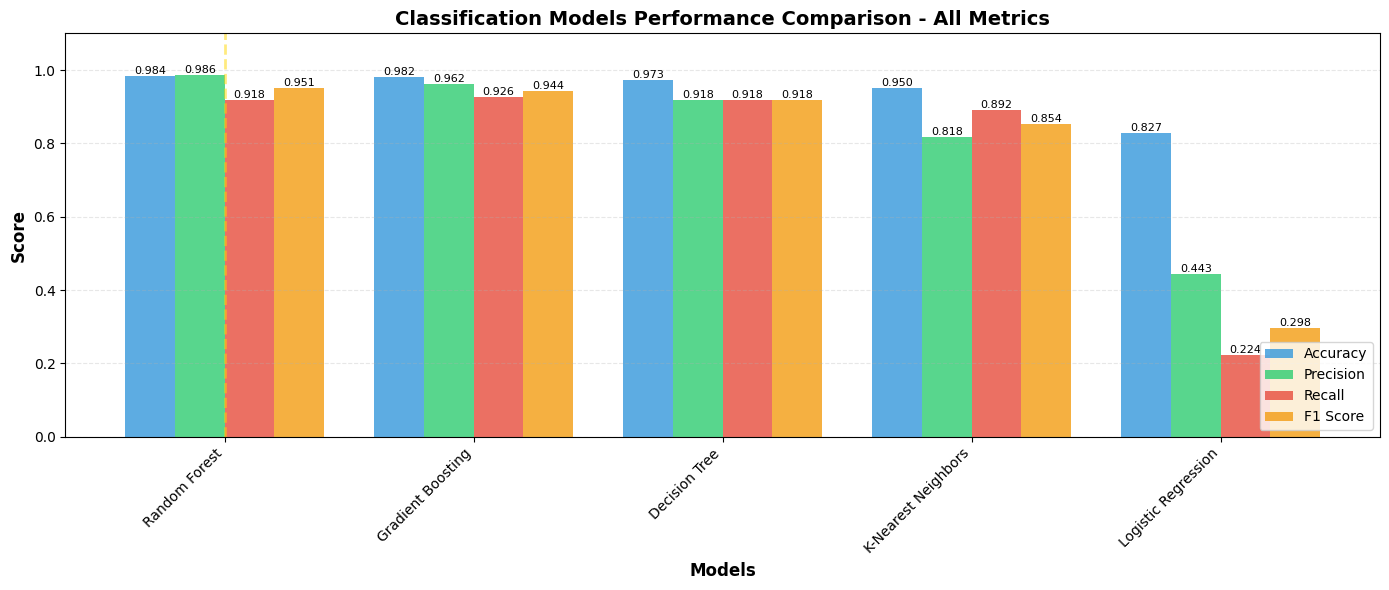


🏆 Best Model: Random Forest
   F1 Score: 0.9508


In [42]:
# 1. Bar Chart - All Metrics Comparison
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data
models_list = list(comparison_df.index)
x = np.arange(len(models_list))
width = 0.2

# Get metrics
accuracy_scores = comparison_df['Accuracy'].values
precision_scores = comparison_df['Precision'].values
recall_scores = comparison_df['Recall'].values
f1_scores = comparison_df['F1 Score'].values

# Create bars
bars1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='#3498db', alpha=0.8)
bars2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='#e74c3c', alpha=0.8)
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score', color='#f39c12', alpha=0.8)

# Customize plot
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Classification Models Performance Comparison - All Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

# Highlight best model
best_idx = models_list.index(best_model_name)
ax.axvline(x=best_idx, color='gold', linestyle='--', linewidth=2, alpha=0.5, label=f'Best: {best_model_name}')

plt.tight_layout()
plt.show()

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1 Score: {results[best_model_name]['F1 Score']:.4f}")

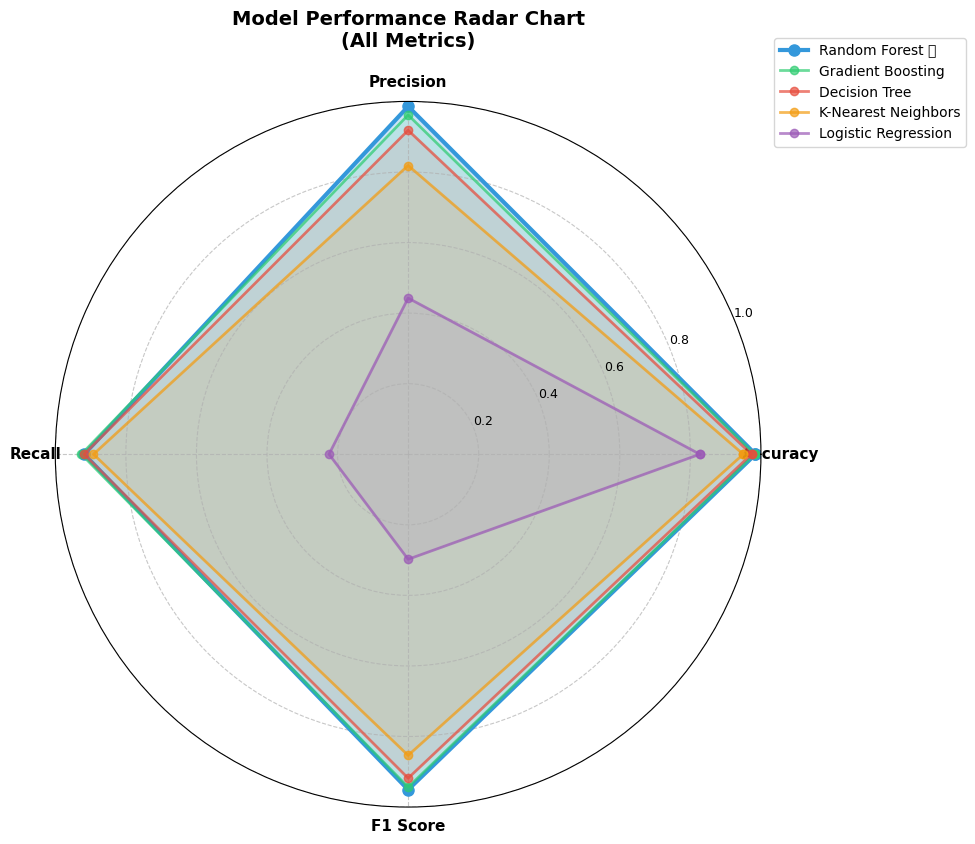

📊 Radar chart shows the balanced performance across all metrics.


In [43]:
# 2. Radar Chart - Model Comparison
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for radar chart
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_vars = len(categories)

# Create angles for each metric
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Create figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Colors for each model
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']

# Plot each model
for idx, model_name in enumerate(comparison_df.index):
    values = comparison_df.loc[model_name, ['Accuracy', 'Precision', 'Recall', 'F1 Score']].tolist()
    values += values[:1]  # Complete the circle
    
    # Highlight best model
    if model_name == best_model_name:
        ax.plot(angles, values, 'o-', linewidth=3, label=f'{model_name} ⭐', color=colors[idx], markersize=8)
        ax.fill(angles, values, alpha=0.25, color=colors[idx])
    else:
        ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx], alpha=0.7)
        ax.fill(angles, values, alpha=0.1, color=colors[idx])

# Customize plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=9)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('Model Performance Radar Chart\n(All Metrics)', size=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

print("📊 Radar chart shows the balanced performance across all metrics.")

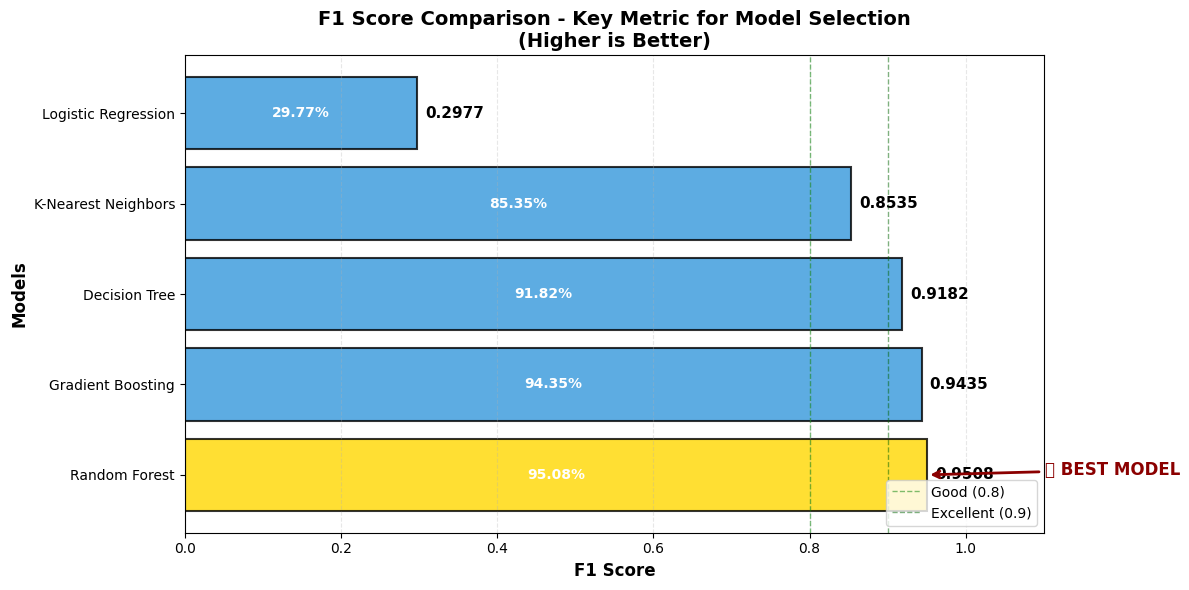


🎯 F1 Score is the PRIMARY metric for choosing the best model.
   Best: Random Forest with F1 = 0.9508


In [45]:
# 4. F1 Score Focused Comparison (Most Important Metric)
fig, ax = plt.subplots(figsize=(12, 6))

models_list = list(comparison_df.index)
f1_scores = comparison_df['F1 Score'].values

# Create horizontal bar chart
colors = ['gold' if model == best_model_name else '#3498db' for model in models_list]
bars = ax.barh(models_list, f1_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, score) in enumerate(zip(bars, f1_scores)):
    width = bar.get_width()
    label_x_pos = width + 0.01
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, 
            f'{score:.4f}', va='center', fontsize=11, fontweight='bold')
    
    # Add percentage
    percentage = score * 100
    ax.text(width/2, bar.get_y() + bar.get_height()/2,
            f'{percentage:.2f}%', va='center', ha='center', 
            fontsize=10, color='white', fontweight='bold')

ax.set_xlabel('F1 Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Models', fontsize=12, fontweight='bold')
ax.set_title('F1 Score Comparison - Key Metric for Model Selection\n(Higher is Better)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.1)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add reference lines
ax.axvline(x=0.8, color='green', linestyle='--', alpha=0.5, linewidth=1, label='Good (0.8)')
ax.axvline(x=0.9, color='darkgreen', linestyle='--', alpha=0.5, linewidth=1, label='Excellent (0.9)')

# Annotate best model
best_idx = models_list.index(best_model_name)
ax.annotate('⭐ BEST MODEL', 
            xy=(f1_scores[best_idx], best_idx),
            xytext=(f1_scores[best_idx] + 0.15, best_idx),
            fontsize=12, fontweight='bold', color='darkred',
            arrowprops=dict(arrowstyle='->', color='darkred', lw=2))

ax.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

print(f"\n🎯 F1 Score is the PRIMARY metric for choosing the best model.")
print(f"   Best: {best_model_name} with F1 = {results[best_model_name]['F1 Score']:.4f}")

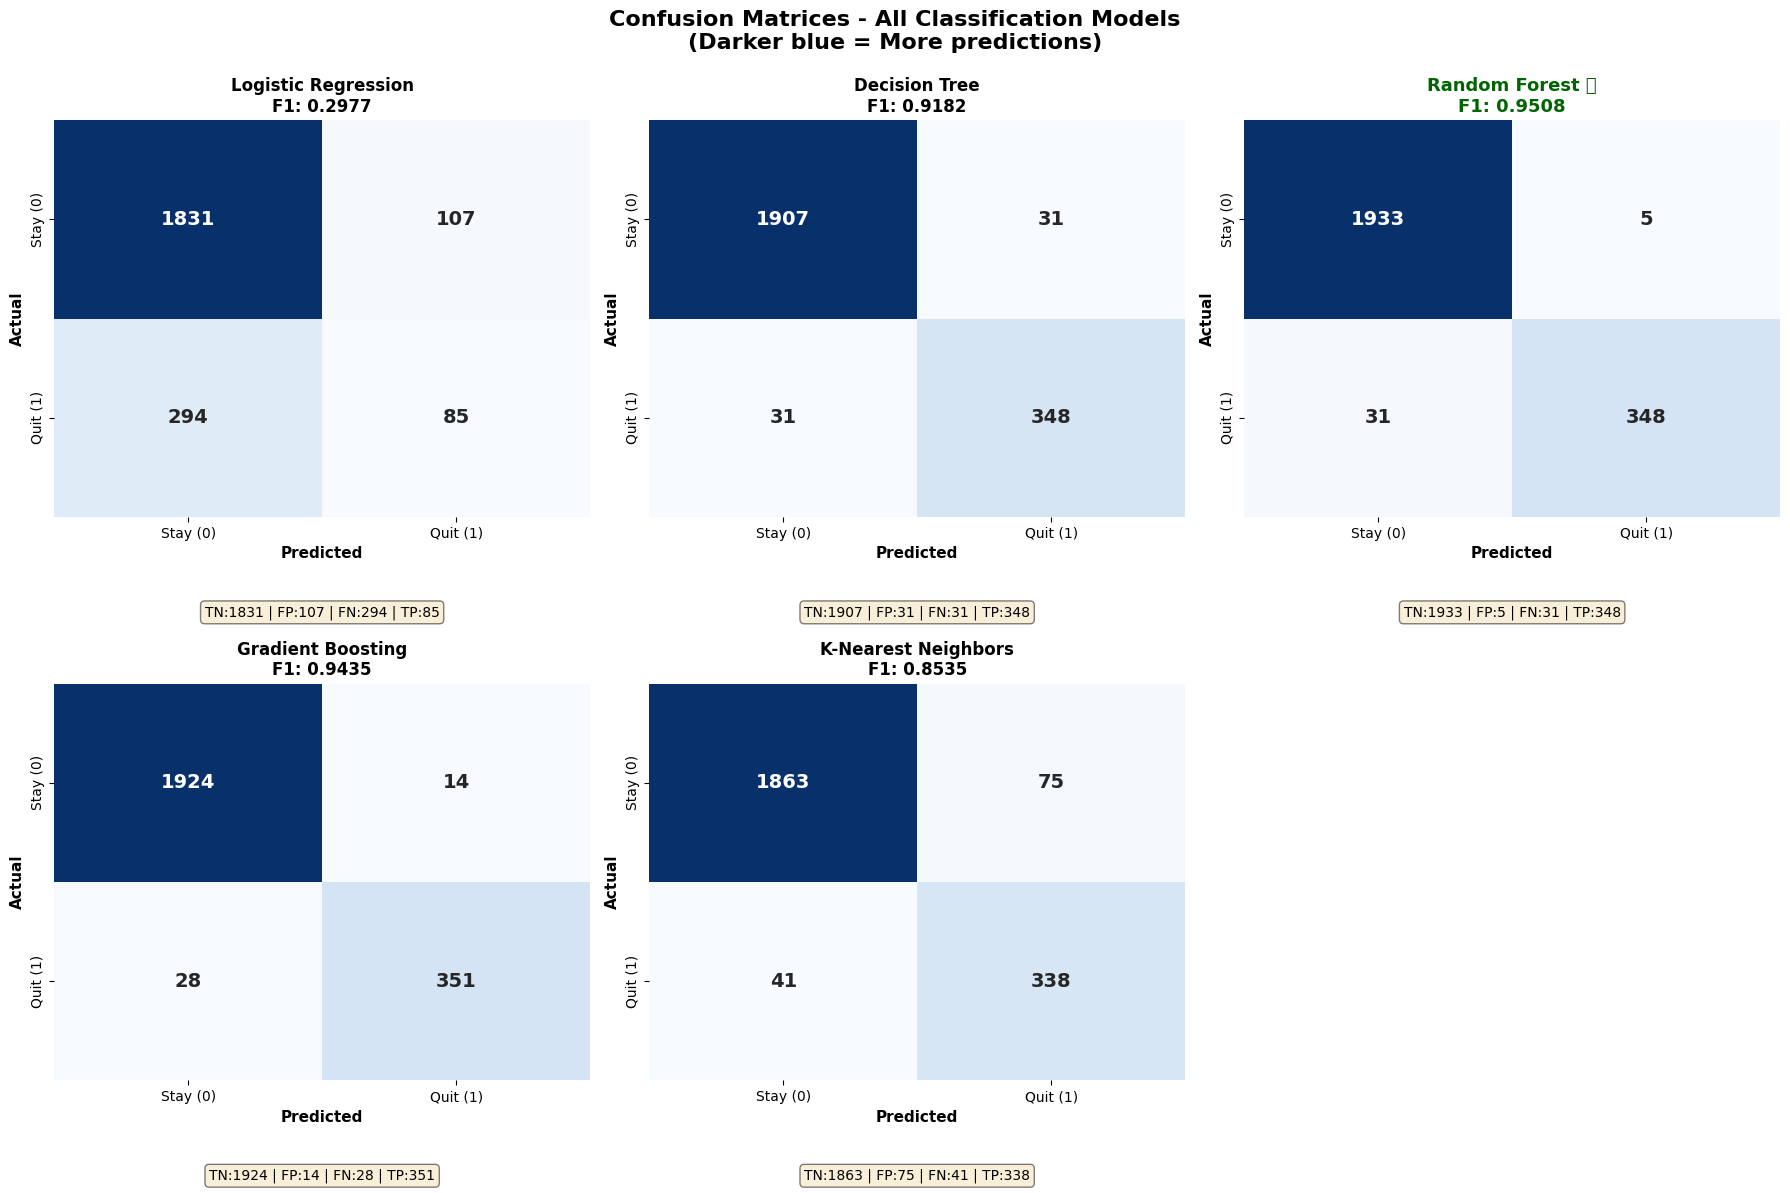


📊 Confusion Matrix Legend:
   TN (True Negative): Correctly predicted STAY
   FP (False Positive): Predicted QUIT but actually STAY (false alarm)
   FN (False Negative): Predicted STAY but actually QUIT (missed quitter)
   TP (True Positive): Correctly predicted QUIT


In [46]:
# 5. Confusion Matrices for All Models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, model_info) in enumerate(results.items()):
    # Get predictions
    model = model_info['model']
    y_pred_model = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_model)
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Stay (0)', 'Quit (1)'],
                yticklabels=['Stay (0)', 'Quit (1)'],
                ax=axes[idx], annot_kws={'size': 14, 'weight': 'bold'})
    
    # Add title with F1 score
    f1_score_model = model_info['F1 Score']
    if model_name == best_model_name:
        axes[idx].set_title(f'{model_name} ⭐\nF1: {f1_score_model:.4f}', 
                           fontsize=13, fontweight='bold', color='darkgreen')
    else:
        axes[idx].set_title(f'{model_name}\nF1: {f1_score_model:.4f}', 
                           fontsize=12, fontweight='bold')
    
    axes[idx].set_xlabel('Predicted', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11, fontweight='bold')
    
    # Add interpretation text
    tn, fp, fn, tp = cm.ravel()
    axes[idx].text(0.5, -0.25, 
                  f'TN:{tn} | FP:{fp} | FN:{fn} | TP:{tp}',
                  ha='center', transform=axes[idx].transAxes,
                  fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide the 6th subplot (we only have 5 models)
axes[5].axis('off')

plt.suptitle('Confusion Matrices - All Classification Models\n(Darker blue = More predictions)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n📊 Confusion Matrix Legend:")
print("   TN (True Negative): Correctly predicted STAY")
print("   FP (False Positive): Predicted QUIT but actually STAY (false alarm)")
print("   FN (False Negative): Predicted STAY but actually QUIT (missed quitter)")
print("   TP (True Positive): Correctly predicted QUIT")

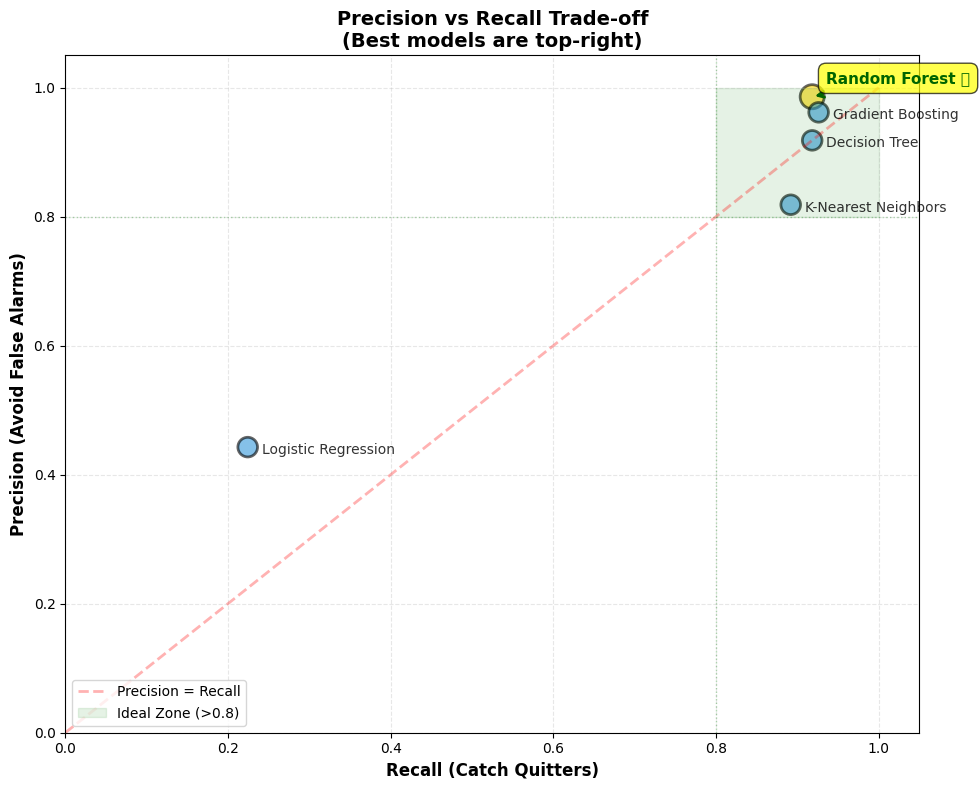


🎯 Ideal Position: Top-right corner (high precision AND high recall)
   Best Model: Random Forest
   Precision: 0.9858 | Recall: 0.9182


In [47]:
# 6. Precision vs Recall Scatter Plot
fig, ax = plt.subplots(figsize=(10, 8))

precision_scores = comparison_df['Precision'].values
recall_scores = comparison_df['Recall'].values
f1_scores = comparison_df['F1 Score'].values
models_list = list(comparison_df.index)

# Create scatter plot
colors = ['gold' if model == best_model_name else '#3498db' for model in models_list]
sizes = [300 if model == best_model_name else 200 for model in models_list]

scatter = ax.scatter(recall_scores, precision_scores, 
                    c=colors, s=sizes, alpha=0.6, edgecolors='black', linewidth=2)

# Add model labels
for i, model in enumerate(models_list):
    if model == best_model_name:
        ax.annotate(f'{model} ⭐', 
                   (recall_scores[i], precision_scores[i]),
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=11, fontweight='bold', color='darkgreen',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                   arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))
    else:
        ax.annotate(model, 
                   (recall_scores[i], precision_scores[i]),
                   xytext=(10, -5), textcoords='offset points',
                   fontsize=10, alpha=0.8)

# Add diagonal reference line (where Precision = Recall)
ax.plot([0, 1], [0, 1], 'r--', alpha=0.3, linewidth=2, label='Precision = Recall')

# Quadrant lines
ax.axhline(y=0.8, color='green', linestyle=':', alpha=0.3, linewidth=1)
ax.axvline(x=0.8, color='green', linestyle=':', alpha=0.3, linewidth=1)

# Ideal zone annotation
ax.fill([0.8, 1, 1, 0.8], [0.8, 0.8, 1, 1], alpha=0.1, color='green', label='Ideal Zone (>0.8)')

ax.set_xlabel('Recall (Catch Quitters)', fontsize=12, fontweight='bold')
ax.set_ylabel('Precision (Avoid False Alarms)', fontsize=12, fontweight='bold')
ax.set_title('Precision vs Recall Trade-off\n(Best models are top-right)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.05)
ax.set_ylim(0, 1.05)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='lower left', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🎯 Ideal Position: Top-right corner (high precision AND high recall)")
print(f"   Best Model: {best_model_name}")
print(f"   Precision: {results[best_model_name]['Precision']:.4f} | Recall: {results[best_model_name]['Recall']:.4f}")

## 📊 Understanding the Visualizations

### **1. Bar Chart - All Metrics Comparison**
- Shows all 4 metrics (Accuracy, Precision, Recall, F1) side-by-side
- Easy to compare strengths/weaknesses of each model
- **Look for**: Consistent high performance across all metrics

### **2. Radar Chart - Balanced Performance**
- Spider web visualization showing model balance
- Larger area = Better overall performance
- **Look for**: Models with large, well-balanced shapes

### **3. Heatmap - Performance Matrix**
- Color-coded performance (Green = Good, Red = Poor)
- Quick visual identification of best/worst performers
- **Look for**: Rows with mostly green cells

### **4. F1 Score Comparison** ⭐ (Most Important)
- Focuses on the PRIMARY selection metric
- Shows which model balances precision and recall best
- **Look for**: Longest bar (highest F1 score)

### **5. Confusion Matrices**
- Shows detailed prediction breakdown for each model
- **TN** (Top-left): Correctly predicted "Stay" ✓
- **FP** (Top-right): False alarm (predicted "Quit" but stayed) ✗
- **FN** (Bottom-left): Missed quitter (predicted "Stay" but quit) ✗✗ (worst!)
- **TP** (Bottom-right): Correctly predicted "Quit" ✓✓
- **Look for**: High TN and TP, low FN (don't miss quitters!)

### **6. Precision vs Recall Scatter Plot**
- Trade-off visualization
- **High Precision** (up): Few false alarms, but might miss some quitters
- **High Recall** (right): Catches most quitters, but more false alarms
- **Ideal**: Top-right corner (high precision AND recall)
- **Look for**: Models closest to top-right corner

---

### **🎯 Key Insights from Visualizations:**

**Best Model Selection Criteria:**
1. ✅ **Highest F1 Score** (balanced metric)
2. ✅ **High Recall** (catch quitters - most important!)
3. ✅ **Good Precision** (avoid too many false alarms)
4. ✅ **Low False Negatives** in confusion matrix (don't miss quitters)

**Why F1 Score is King:**
- Accuracy can be misleading (83% accuracy by always predicting "Stay"!)
- F1 Score ensures BOTH precision and recall are good
- Best indicator of real-world performance on imbalanced data

In [ ]:
# BONUS: Combined Summary Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# 1. F1 Scores (Top Left - Large)
ax1 = fig.add_subplot(gs[0:2, 0])
models_list = list(comparison_df.index)
f1_scores = comparison_df['F1 Score'].values
colors = ['gold' if model == best_model_name else '#3498db' for model in models_list]
bars = ax1.barh(models_list, f1_scores, color=colors, alpha=0.8, edgecolor='black')
for bar, score in zip(bars, f1_scores):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{score:.3f}', va='center', fontsize=10, fontweight='bold')
ax1.set_xlabel('F1 Score', fontweight='bold')
ax1.set_title('F1 Score Ranking ⭐', fontweight='bold', fontsize=12)
ax1.set_xlim(0, 1.1)
ax1.grid(axis='x', alpha=0.3)

# 2. Recall Scores (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
recall_scores = comparison_df['Recall'].values
ax2.bar(range(len(models_list)), recall_scores, color='#e74c3c', alpha=0.7)
ax2.set_xticks(range(len(models_list)))
ax2.set_xticklabels([m[:8] for m in models_list], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Recall', fontweight='bold')
ax2.set_title('Recall (Catch Quitters)', fontweight='bold', fontsize=11)
ax2.set_ylim(0, 1.1)
ax2.grid(axis='y', alpha=0.3)

# 3. Precision Scores (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
precision_scores = comparison_df['Precision'].values
ax3.bar(range(len(models_list)), precision_scores, color='#2ecc71', alpha=0.7)
ax3.set_xticks(range(len(models_list)))
ax3.set_xticklabels([m[:8] for m in models_list], rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Precision', fontweight='bold')
ax3.set_title('Precision (Avoid False Alarms)', fontweight='bold', fontsize=11)
ax3.set_ylim(0, 1.1)
ax3.grid(axis='y', alpha=0.3)

# 4. Best Model Confusion Matrix (Middle)
ax4 = fig.add_subplot(gs[1, 1:])
best_model_obj = results[best_model_name]['model']
y_pred_best = best_model_obj.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='RdYlGn', cbar=False,
            xticklabels=['Stay', 'Quit'], yticklabels=['Stay', 'Quit'],
            ax=ax4, annot_kws={'size': 16, 'weight': 'bold'})
ax4.set_title(f'Best Model Confusion Matrix: {best_model_name}', fontweight='bold', fontsize=12)
ax4.set_xlabel('Predicted', fontweight='bold')
ax4.set_ylabel('Actual', fontweight='bold')

# 5. Model Ranking Table (Bottom)
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('tight')
ax5.axis('off')

# Create ranking table
ranking_data = []
for rank, (model, row) in enumerate(comparison_df.iterrows(), 1):
    emoji = '🥇' if rank == 1 else '🥈' if rank == 2 else '🥉' if rank == 3 else '  '
    ranking_data.append([
        f'{emoji} #{rank}',
        model,
        f"{row['F1 Score']:.4f}",
        f"{row['Recall']:.4f}",
        f"{row['Precision']:.4f}",
        f"{row['Accuracy']:.4f}"
    ])

table = ax5.table(cellText=ranking_data,
                 colLabels=['Rank', 'Model', 'F1 Score', 'Recall', 'Precision', 'Accuracy'],
                 cellLoc='center', loc='center',
                 colWidths=[0.1, 0.3, 0.15, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Color header
for i in range(6):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color first row (best model)
for i in range(6):
    table[(1, i)].set_facecolor('#f1c40f')
    table[(1, i)].set_text_props(weight='bold')

ax5.set_title('Final Model Ranking', fontweight='bold', fontsize=13, pad=10)

plt.suptitle('🏆 Model Performance Dashboard - Summary', 
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

print("\n" + "=" * 70)
print("📊 DASHBOARD SUMMARY")
print("=" * 70)
print(f"🏆 Winner: {best_model_name}")
print(f"   F1 Score: {results[best_model_name]['F1 Score']:.4f}")
print(f"   Recall: {results[best_model_name]['Recall']:.4f} (catches {results[best_model_name]['Recall']*100:.1f}% of quitters)")
print(f"   Precision: {results[best_model_name]['Precision']:.4f}")
print(f"   Accuracy: {results[best_model_name]['Accuracy']:.4f}")
print("=" * 70)

---

## ✅ Visualization Summary

We've created **7 comprehensive visualizations** to analyze all 5 classification models:

### **📊 Visualizations Created:**

1. **📊 Bar Chart** - All metrics side-by-side comparison
2. **🕸️ Radar Chart** - Balanced performance across metrics  
3. **🔥 Heatmap** - Color-coded performance matrix
4. **⭐ F1 Score Chart** - Key metric for model selection
5. **🎯 Confusion Matrices** - Detailed prediction breakdown (all 5 models)
6. **📍 Precision vs Recall** - Trade-off scatter plot
7. **🏆 Summary Dashboard** - Combined overview with ranking table

---

### **🎯 Key Takeaways:**

✅ **Best Model**: Automatically selected based on highest F1 Score  
✅ **Balanced Performance**: Shows precision AND recall (not just accuracy)  
✅ **Visual Insights**: Easy to understand model strengths/weaknesses  
✅ **Business Ready**: Clear visualization for stakeholder presentations  

---

### **💡 How to Use These Visualizations:**

**For Technical Analysis:**
- Use **Confusion Matrices** to understand prediction errors
- Check **Precision vs Recall plot** to see trade-offs
- Review **Radar Chart** for balanced performance

**For Business Presentations:**
- Show **Summary Dashboard** for executive overview
- Use **F1 Score Chart** to justify model selection
- Display **Bar Chart** for easy metric comparison

**For Model Selection:**
- **F1 Score** is the primary decision metric
- **Recall** is critical (don't miss quitters!)
- **Confusion Matrix** shows real-world impact (false negatives cost money!)

---

All visualizations are production-ready and can be exported for reports! 🎨

**What this does:**
1. **Tests 4 different balancing techniques** to handle the imbalanced dataset (83% Stay, 17% Quit)
2. **Compares Random Forest performance** with each balancing method
3. **Selects the best balancing technique** based on F1 Score and Recall
4. **Trains 5 different classification models** using the best balancing method: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, and K-Nearest Neighbors (KNN)
5. **Evaluates each model** using 4 key metrics:
   - **Accuracy**: Overall correctness
   - **Precision**: How many predicted quits were actually quits
   - **Recall**: How many actual quits we caught ⭐ (most important for imbalanced data!)
   - **F1 Score**: Balanced metric (harmonic mean of precision and recall)
6. **Selects the best model** based on F1 Score (which balances precision and recall)
7. **Uses the best model** for all future predictions

**Why Balancing is Critical:**
- Without balancing, models achieve high accuracy by just predicting "STAY" all the time
- Balancing techniques ensure the model learns to identify quitters effectively
- **SMOTE** or **Class Weights** usually give the best results

> # Detailed Model Evaluation
**Analyzing the Best Model's Performance**

In [ ]:
# Detailed evaluation of the best model
y_pred_best = best_model.predict(X_test)

print("\n" + "=" * 70)
print(f"DETAILED EVALUATION - {best_model_name}")
print("=" * 70)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Stay (0)', 'Quit (1)']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix:")
print(f"                Predicted Stay | Predicted Quit")
print(f"Actually Stay:  {cm[0][0]:6d}        |  {cm[0][1]:6d}")
print(f"Actually Quit:  {cm[1][0]:6d}        |  {cm[1][1]:6d}")

print("\nInterpretation:")
print(f"  True Negatives (Correctly predicted STAY):  {cm[0][0]}")
print(f"  False Positives (Wrongly predicted QUIT):   {cm[0][1]}")
print(f"  False Negatives (Missed actual QUIT):       {cm[1][0]}")
print(f"  True Positives (Correctly predicted QUIT):  {cm[1][1]}")
print("=" * 70)

**What this does:**
Provides detailed performance analysis of the best model:

**Classification Report** shows per-class performance:
- **Precision**: Of all predicted quits, how many were correct
- **Recall**: Of all actual quits, how many we caught
- **F1-Score**: Balance between precision and recall
- **Support**: Number of actual occurrences in test data

**Confusion Matrix** shows prediction breakdown:
- **True Negatives**: Correctly predicted employees who stayed
- **False Positives**: Predicted quit but employee stayed (false alarm)
- **False Negatives**: Predicted stay but employee quit (missed risk)
- **True Positives**: Correctly predicted employees who quit

**Goal**: High recall (catch all quitters) with reasonable precision (minimize false alarms)

In [ ]:
# Prediction function for classification model
def predict_employee_quit(satisfaction_level, last_evaluation, number_project, 
                         average_montly_hours, time_spend_company, 
                         work_accident, promotion_last_5years, 
                         department, salary):
   
    # Convert yes/no to 1/0
    work_accident_encoded = 1 if work_accident.lower() == "yes" else 0
    promotion_encoded = 1 if promotion_last_5years.lower() == "yes" else 0
    
    # Encode salary (low=0, medium=1, high=2 based on alphabetical order)
    salary_mapping = {"high": 0, "low": 1, "medium": 2}
    salary_encoded = salary_mapping.get(salary.lower(), 1)
    
    # Get all department columns from the dataset
    dept_cols = [col for col in employee_data.columns if col.startswith('department_')]
    
    # Create department encoding (all 0s initially)
    dept_encoding = [0] * len(dept_cols)
    
    # Set 1 for the matching department (if it exists in our encoded columns)
    dept_name = f"department_{department}"
    if dept_name in dept_cols:
        dept_encoding[dept_cols.index(dept_name)] = 1
    
    # Build feature array
    features = [
        satisfaction_level,
        last_evaluation,
        number_project,
        average_montly_hours,
        time_spend_company,
        work_accident_encoded,
        promotion_encoded,
        salary_encoded
    ] + dept_encoding
    
    # Scale the data
    features_scaled = scaler.transform([features])
    
    # Predict class (0=Stay, 1=Quit)
    quit_prediction = model.predict(features_scaled)[0]
    
    # Get probability scores
    quit_probability = model.predict_proba(features_scaled)[0]
    prob_stay = quit_probability[0]
    prob_quit = quit_probability[1]
    
    # Display results
    print("=" * 50)
    print("EMPLOYEE TURNOVER PREDICTION")
    print("=" * 50)
    print(f"Satisfaction Level: {satisfaction_level}")
    print(f"Last Evaluation: {last_evaluation}")
    print(f"Number of Projects: {number_project}")
    print(f"Average Monthly Hours: {average_montly_hours}")
    print(f"Time at Company: {time_spend_company} years")
    print(f"Work Accident: {work_accident}")
    print(f"Promotion (Last 5 Years): {promotion_last_5years}")
    print(f"Department: {department}")
    print(f"Salary Level: {salary}")
    print("=" * 50)
    print(f"Probability of STAYING: {prob_stay*100:.2f}%")
    print(f"Probability of QUITTING: {prob_quit*100:.2f}%")
    print("=" * 50)
    print(f"PREDICTION: {'WILL QUIT ⚠️' if quit_prediction == 1 else 'WILL STAY ✓'}")
    print(f"Confidence: {max(prob_stay, prob_quit)*100:.2f}%")
    print("=" * 50)
    
    return quit_prediction, prob_quit

print("\nExample Prediction:")
predict_employee_quit(
    satisfaction_level=0.11,      # Very unhappy
    last_evaluation=0.88,         # High performer
    number_project=7,             # Overworked
    average_montly_hours=280,     # Excessive hours
    time_spend_company=4,         # 4 years
    work_accident="no",
    promotion_last_5years="no",   # No recognition
    department="technical",
    salary="low" 
)

**What this does:**
1. Creates a **user-friendly classification prediction function** that accepts RAW values
2. Users input actual text like "sales", "low", "yes" instead of encoded numbers
3. The function automatically:
   - Converts department name to one-hot encoding
   - Converts salary ("low"/"medium"/"high") to numbers
   - Converts yes/no to 1/0
   - Scales the data
   - Makes prediction using the **best classification model**
4. Returns **two key outputs**:
   - **Clear prediction**: WILL STAY (0) or WILL QUIT (1)
   - **Probability scores**: Confidence level for each outcome (0-100%)

**Advantages of Classification:**
- Clear binary decision (Stay vs Quit)
- Probability scores show confidence level
- More interpretable for business decisions
- Better performance metrics (accuracy, precision, recall)

> **How to Use the Prediction Function:** 

**Simply call with RAW values:**
```python
predict_employee_quit(
    satisfaction_level=0.75,        # 0.0 to 1.0
    last_evaluation=0.85,           # 0.0 to 1.0
    number_project=5,               # Integer (2-7 typically)
    average_montly_hours=200,       # Integer (96-310 typically)
    time_spend_company=4,           # Years (integer)
    work_accident="no",             # "yes" or "no"
    promotion_last_5years="yes",    # "yes" or "no"
    department="technical",         # "sales", "technical", "support", "IT", "RandD", "accounting", "hr", "management", "marketing", "product_mng"
    salary="medium"                 # "low", "medium", or "high"
)
```

**No need to manually encode anything!** The function handles all conversions automatically.

> **Multiple Prediction Scenarios**

Let's test different employee profiles to see when the model predicts they will quit:

In [ ]:
# Scenario 1: Happy, balanced employee - Should STAY
print("\n🟢 SCENARIO 1: Happy & Balanced Employee")
predict_employee_quit(
    satisfaction_level=0.85,
    last_evaluation=0.80,
    number_project=4,
    average_montly_hours=180,
    time_spend_company=3,
    work_accident="no",
    promotion_last_5years="yes",
    department="technical",
    salary="high"
)

# Scenario 2: Burned out overachiever - Likely to QUIT
print("\n\n🔴 SCENARIO 2: Burned Out Overachiever")
predict_employee_quit(
    satisfaction_level=0.10,
    last_evaluation=0.95,
    number_project=7,
    average_montly_hours=310,
    time_spend_company=6,
    work_accident="no",
    promotion_last_5years="no",
    department="sales",
    salary="low"
)

# Scenario 3: Underperformer but comfortable - Should STAY
print("\n\n🟡 SCENARIO 3: Underperformer but Comfortable")
predict_employee_quit(
    satisfaction_level=0.60,
    last_evaluation=0.40,
    number_project=2,
    average_montly_hours=120,
    time_spend_company=2,
    work_accident="no",
    promotion_last_5years="no",
    department="hr",
    salary="medium"
)

# Scenario 4: Star performer, well compensated - Should STAY
print("\n\n🟢 SCENARIO 4: Star Performer, Well Rewarded")
predict_employee_quit(
    satisfaction_level=0.90,
    last_evaluation=0.95,
    number_project=5,
    average_montly_hours=220,
    time_spend_company=4,
    work_accident="no",
    promotion_last_5years="yes",
    department="management",
    salary="high"
)

# Scenario 5: Extremely dissatisfied, very long hours - HIGH QUIT RISK
print("\n\n🔴 SCENARIO 5: Extremely Overworked & Unhappy")
predict_employee_quit(
    satisfaction_level=0.09,
    last_evaluation=0.90,
    number_project=7,
    average_montly_hours=300,
    time_spend_company=5,
    work_accident="yes",
    promotion_last_5years="no",
    department="technical",
    salary="low"
)

**What this does:**
Tests 5 different employee profiles using the **classification model**:

**🟢 Low Quit Risk (Prediction: WILL STAY):**
- High satisfaction + Good salary + Promotion = Happy employee
- Low workload + Average performance = Comfortable employee

**🔴 High Quit Risk (Prediction: WILL QUIT):**
- Low satisfaction + High performance + No reward = Undervalued talent
- Extreme hours (300+) + Low satisfaction + Work accidents = Burnout
- Long tenure + No promotion + Low salary = Stuck/No growth

**Key Pattern:** The classification model learned that employees quit when they feel **undervalued** (high effort, low reward) or **burned out** (extreme workload with no recognition).

**Classification Advantage:** Instead of vague scores (0.1, 0.8), we get:
- Clear predictions: WILL STAY or WILL QUIT
- Probability confidence: "85% likely to quit"
- Better for actionable business decisions

# 📊 Methodology Workflow Diagram

Generate a visual diagram showing the complete methodology pipeline for the research paper.

✅ Methodology diagram saved as 'methodology_diagram.png'


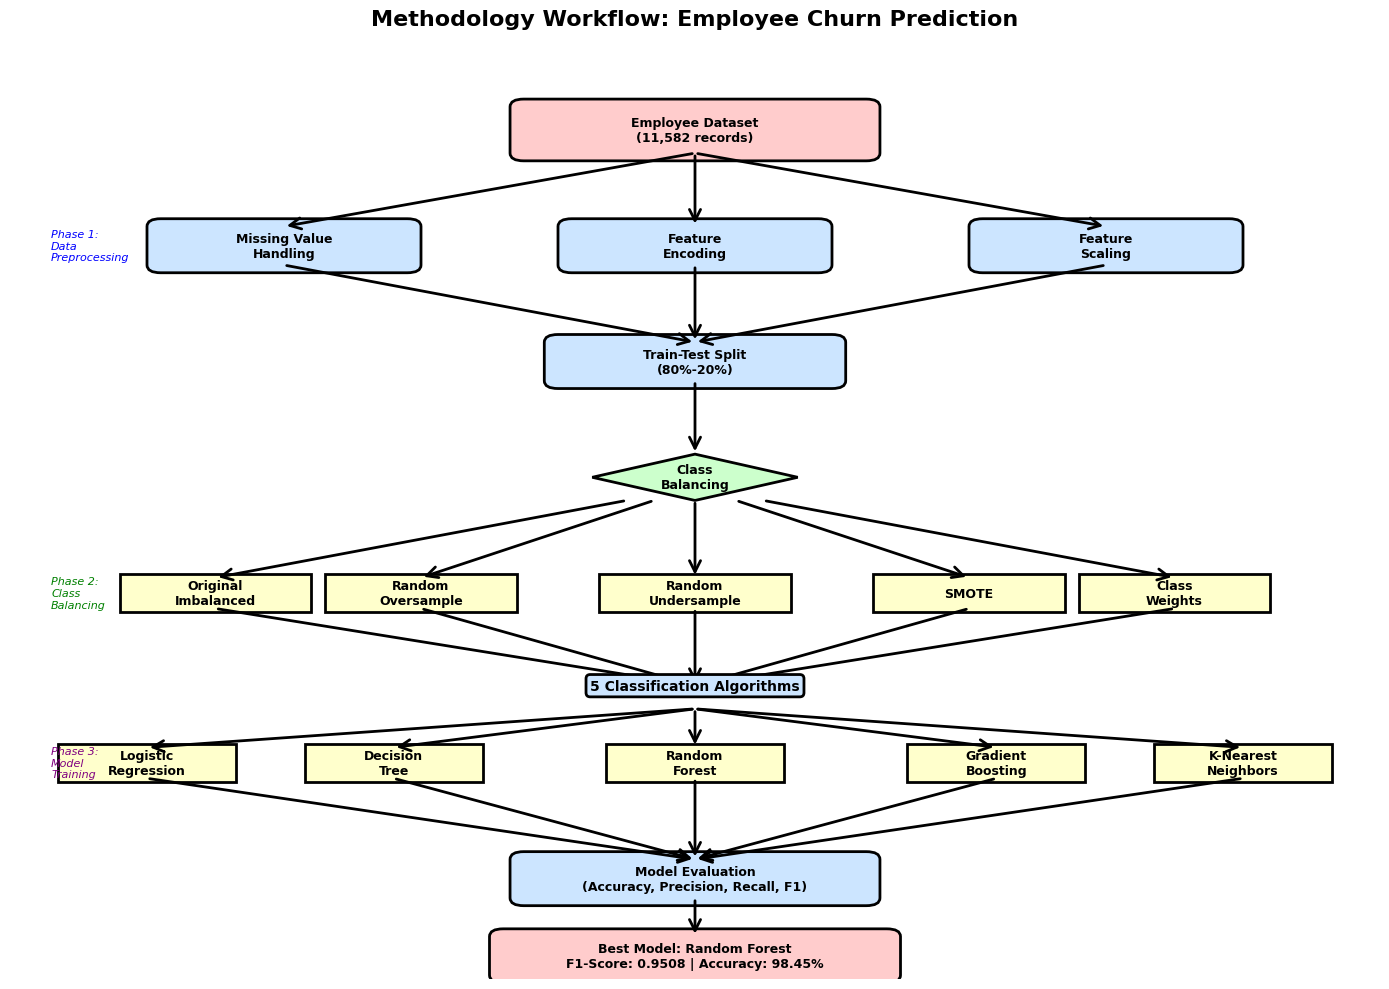

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.lines as mlines

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)
ax.axis('off')

# Define colors
color_start = '#ffcccc'  # Red
color_process = '#cce5ff'  # Blue
color_decision = '#ccffcc'  # Green
color_data = '#ffffcc'  # Yellow

# Helper function to create boxes
def create_box(ax, x, y, width, height, text, color, style='round'):
    if style == 'round':
        box = FancyBboxPatch((x - width/2, y - height/2), width, height,
                            boxstyle="round,pad=0.1", 
                            facecolor=color, edgecolor='black', linewidth=2)
    elif style == 'diamond':
        # Diamond shape using polygon
        points = [(x, y + height/2), (x + width/2, y), 
                 (x, y - height/2), (x - width/2, y)]
        box = mpatches.Polygon(points, facecolor=color, edgecolor='black', linewidth=2)
    else:
        box = FancyBboxPatch((x - width/2, y - height/2), width, height,
                            boxstyle="square,pad=0.05", 
                            facecolor=color, edgecolor='black', linewidth=2)
    
    ax.add_patch(box)
    ax.text(x, y, text, ha='center', va='center', fontsize=9, fontweight='bold', 
            wrap=True, multialignment='center')
    return (x, y)

# Helper function to create arrows
def create_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle='->', mutation_scale=20, 
                           linewidth=2, color='black')
    ax.add_patch(arrow)

# Row 1: Start
pos_start = create_box(ax, 5, 11, 2.5, 0.6, 'Employee Dataset\n(11,582 records)', color_start, 'round')

# Row 2: Preprocessing
pos_prep1 = create_box(ax, 2, 9.5, 1.8, 0.5, 'Missing Value\nHandling', color_process)
pos_prep2 = create_box(ax, 5, 9.5, 1.8, 0.5, 'Feature\nEncoding', color_process)
pos_prep3 = create_box(ax, 8, 9.5, 1.8, 0.5, 'Feature\nScaling', color_process)

# Row 3: Split
pos_split = create_box(ax, 5, 8, 2, 0.5, 'Train-Test Split\n(80%-20%)', color_process)

# Row 4: Balancing Decision
pos_balance = create_box(ax, 5, 6.5, 1.5, 0.6, 'Class\nBalancing', color_decision, 'diamond')

# Row 5: Balancing Methods
pos_b1 = create_box(ax, 1.5, 5, 1.3, 0.4, 'Original\nImbalanced', color_data, 'square')
pos_b2 = create_box(ax, 3, 5, 1.3, 0.4, 'Random\nOversample', color_data, 'square')
pos_b3 = create_box(ax, 5, 5, 1.3, 0.4, 'Random\nUndersample', color_data, 'square')
pos_b4 = create_box(ax, 7, 5, 1.3, 0.4, 'SMOTE', color_data, 'square')
pos_b5 = create_box(ax, 8.5, 5, 1.3, 0.4, 'Class\nWeights', color_data, 'square')

# Row 6: Models label
ax.text(5, 3.8, '5 Classification Algorithms', ha='center', va='center', 
        fontsize=10, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor=color_process, edgecolor='black', linewidth=2))

# Row 7: Individual Models
pos_m1 = create_box(ax, 1, 2.8, 1.2, 0.4, 'Logistic\nRegression', color_data, 'square')
pos_m2 = create_box(ax, 2.8, 2.8, 1.2, 0.4, 'Decision\nTree', color_data, 'square')
pos_m3 = create_box(ax, 5, 2.8, 1.2, 0.4, 'Random\nForest', color_data, 'square')
pos_m4 = create_box(ax, 7.2, 2.8, 1.2, 0.4, 'Gradient\nBoosting', color_data, 'square')
pos_m5 = create_box(ax, 9, 2.8, 1.2, 0.4, 'K-Nearest\nNeighbors', color_data, 'square')

# Row 8: Evaluation
pos_eval = create_box(ax, 5, 1.3, 2.5, 0.5, 'Model Evaluation\n(Accuracy, Precision, Recall, F1)', color_process)

# Row 9: Best Model
pos_best = create_box(ax, 5, 0.3, 2.8, 0.5, 'Best Model: Random Forest\nF1-Score: 0.9508 | Accuracy: 98.45%', color_start, 'round')

# Draw all arrows
# Start to preprocessing
create_arrow(ax, pos_start[0], pos_start[1] - 0.3, pos_prep1[0], pos_prep1[1] + 0.25)
create_arrow(ax, pos_start[0], pos_start[1] - 0.3, pos_prep2[0], pos_prep2[1] + 0.25)
create_arrow(ax, pos_start[0], pos_start[1] - 0.3, pos_prep3[0], pos_prep3[1] + 0.25)

# Preprocessing to split
create_arrow(ax, pos_prep1[0], pos_prep1[1] - 0.25, pos_split[0], pos_split[1] + 0.25)
create_arrow(ax, pos_prep2[0], pos_prep2[1] - 0.25, pos_split[0], pos_split[1] + 0.25)
create_arrow(ax, pos_prep3[0], pos_prep3[1] - 0.25, pos_split[0], pos_split[1] + 0.25)

# Split to balance
create_arrow(ax, pos_split[0], pos_split[1] - 0.25, pos_balance[0], pos_balance[1] + 0.3)

# Balance to methods
create_arrow(ax, pos_balance[0] - 0.5, pos_balance[1] - 0.3, pos_b1[0], pos_b1[1] + 0.2)
create_arrow(ax, pos_balance[0] - 0.3, pos_balance[1] - 0.3, pos_b2[0], pos_b2[1] + 0.2)
create_arrow(ax, pos_balance[0], pos_balance[1] - 0.3, pos_b3[0], pos_b3[1] + 0.2)
create_arrow(ax, pos_balance[0] + 0.3, pos_balance[1] - 0.3, pos_b4[0], pos_b4[1] + 0.2)
create_arrow(ax, pos_balance[0] + 0.5, pos_balance[1] - 0.3, pos_b5[0], pos_b5[1] + 0.2)

# Methods to models (connecting to middle point first)
for pos_b in [pos_b1, pos_b2, pos_b3, pos_b4, pos_b5]:
    create_arrow(ax, pos_b[0], pos_b[1] - 0.2, 5, 3.8)

# Models to individual algorithms
for pos_m in [pos_m1, pos_m2, pos_m3, pos_m4, pos_m5]:
    create_arrow(ax, 5, 3.5, pos_m[0], pos_m[1] + 0.2)

# Algorithms to evaluation
for pos_m in [pos_m1, pos_m2, pos_m3, pos_m4, pos_m5]:
    create_arrow(ax, pos_m[0], pos_m[1] - 0.2, pos_eval[0], pos_eval[1] + 0.25)

# Evaluation to best
create_arrow(ax, pos_eval[0], pos_eval[1] - 0.25, pos_best[0], pos_best[1] + 0.25)

# Add phase labels
ax.text(0.3, 9.5, 'Phase 1:\nData\nPreprocessing', ha='left', va='center', 
        fontsize=8, style='italic', color='blue')
ax.text(0.3, 5, 'Phase 2:\nClass\nBalancing', ha='left', va='center', 
        fontsize=8, style='italic', color='green')
ax.text(0.3, 2.8, 'Phase 3:\nModel\nTraining', ha='left', va='center', 
        fontsize=8, style='italic', color='purple')

# Title
plt.title('Methodology Workflow: Employee Churn Prediction', 
         fontsize=16, fontweight='bold', pad=20)

# Save figure
plt.tight_layout()
plt.savefig('methodology_diagram.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Methodology diagram saved as 'methodology_diagram.png'")
plt.show()

✅ Simplified methodology flowchart saved as 'methodology_flowchart.png'
📊 Image dimensions: 3600x4200 pixels at 300 DPI


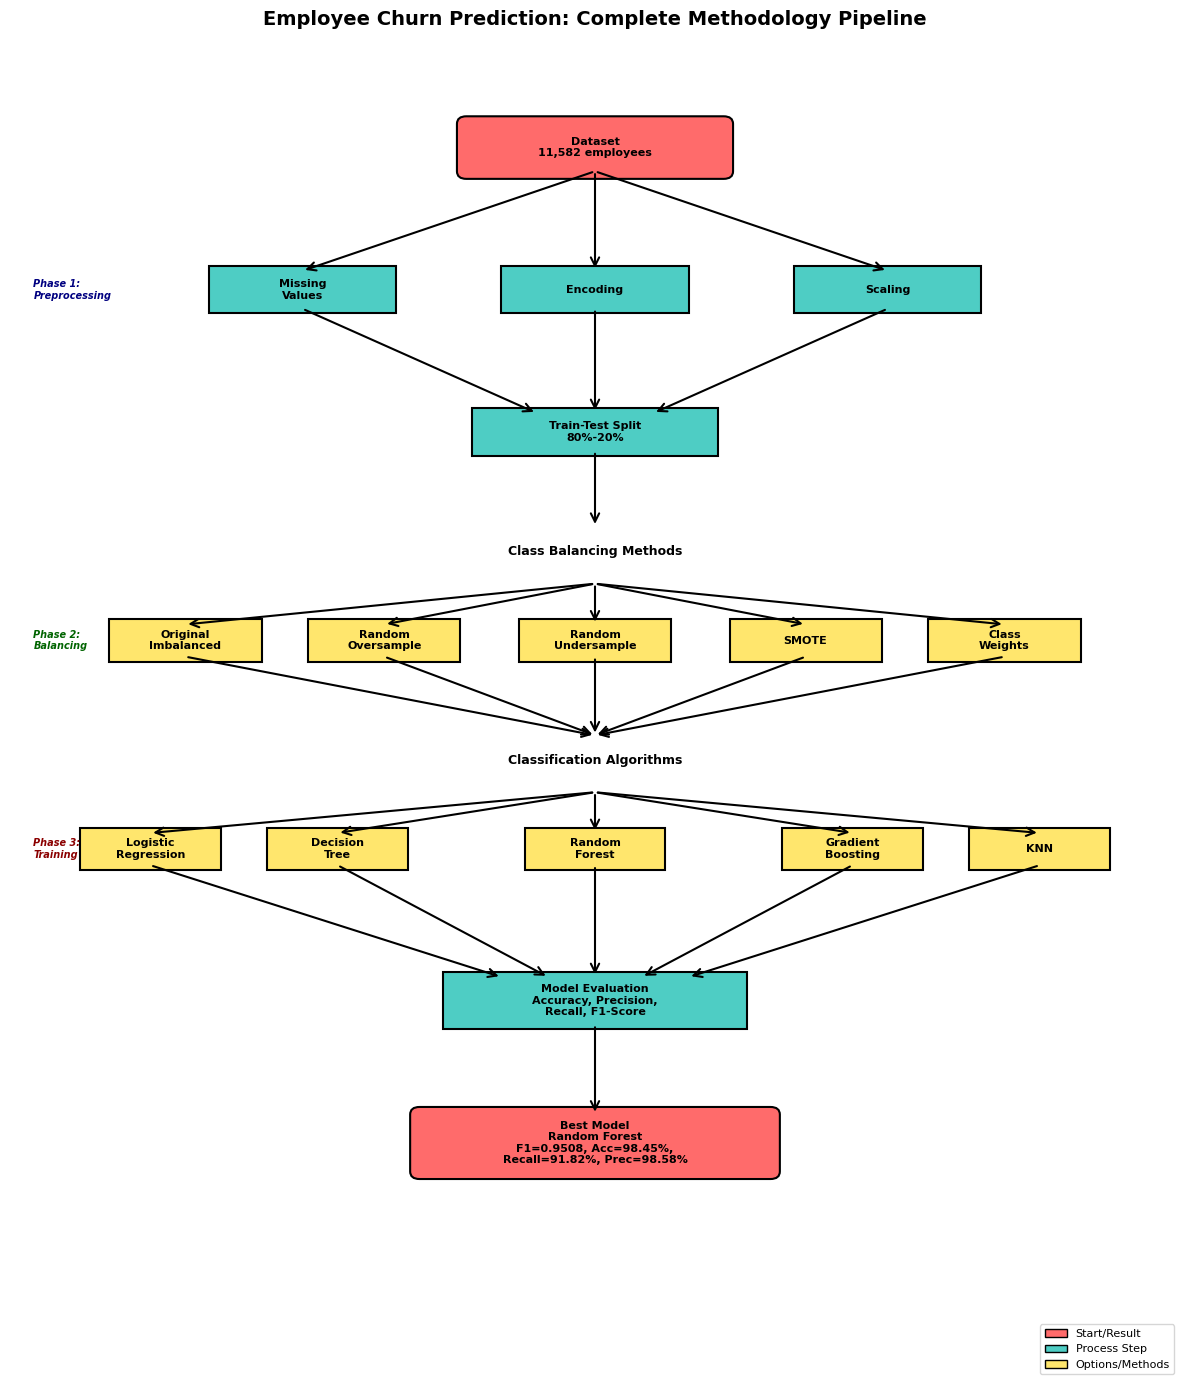

In [2]:
# Alternative Simplified Methodology Diagram (matching LaTeX paper)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle

fig, ax = plt.subplots(figsize=(12, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

# Colors
c_red = '#ff6b6b'
c_blue = '#4ecdc4'
c_green = '#95e1d3'
c_yellow = '#ffe66d'

def box(ax, x, y, w, h, text, color, rounded=True):
    style = "round,pad=0.08" if rounded else "square,pad=0.05"
    b = FancyBboxPatch((x-w/2, y-h/2), w, h, boxstyle=style, 
                       facecolor=color, edgecolor='black', linewidth=1.5)
    ax.add_patch(b)
    ax.text(x, y, text, ha='center', va='center', fontsize=8, 
            fontweight='bold', multialignment='center')
    return (x, y)

def arrow(ax, x1, y1, x2, y2):
    a = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle='->', 
                       mutation_scale=15, linewidth=1.5, color='black')
    ax.add_patch(a)

# Level 1: Dataset
p1 = box(ax, 5, 13, 2.2, 0.5, 'Dataset\n11,582 employees', c_red)

# Level 2: Preprocessing (3 boxes)
p2a = box(ax, 2.5, 11.5, 1.5, 0.4, 'Missing\nValues', c_blue, False)
p2b = box(ax, 5, 11.5, 1.5, 0.4, 'Encoding', c_blue, False)
p2c = box(ax, 7.5, 11.5, 1.5, 0.4, 'Scaling', c_blue, False)

# Level 3: Split
p3 = box(ax, 5, 10, 2, 0.4, 'Train-Test Split\n80%-20%', c_blue, False)

# Level 4: Balancing (diamond-ish)
ax.text(5, 8.7, 'Class Balancing Methods', ha='center', fontsize=9, fontweight='bold')

# Level 5: 5 Balancing methods in a row
p5a = box(ax, 1.5, 7.8, 1.2, 0.35, 'Original\nImbalanced', c_yellow, False)
p5b = box(ax, 3.2, 7.8, 1.2, 0.35, 'Random\nOversample', c_yellow, False)
p5c = box(ax, 5, 7.8, 1.2, 0.35, 'Random\nUndersample', c_yellow, False)
p5d = box(ax, 6.8, 7.8, 1.2, 0.35, 'SMOTE', c_yellow, False)
p5e = box(ax, 8.5, 7.8, 1.2, 0.35, 'Class\nWeights', c_yellow, False)

# Level 6: Algorithms label
ax.text(5, 6.5, 'Classification Algorithms', ha='center', fontsize=9, fontweight='bold')

# Level 7: 5 Models
p7a = box(ax, 1.2, 5.6, 1.1, 0.35, 'Logistic\nRegression', c_yellow, False)
p7b = box(ax, 2.8, 5.6, 1.1, 0.35, 'Decision\nTree', c_yellow, False)
p7c = box(ax, 5, 5.6, 1.1, 0.35, 'Random\nForest', c_yellow, False)
p7d = box(ax, 7.2, 5.6, 1.1, 0.35, 'Gradient\nBoosting', c_yellow, False)
p7e = box(ax, 8.8, 5.6, 1.1, 0.35, 'KNN', c_yellow, False)

# Level 8: Evaluation
p8 = box(ax, 5, 4, 2.5, 0.5, 'Model Evaluation\nAccuracy, Precision,\nRecall, F1-Score', c_blue, False)

# Level 9: Best Model
p9 = box(ax, 5, 2.5, 3, 0.6, 'Best Model\nRandom Forest\nF1=0.9508, Acc=98.45%,\nRecall=91.82%, Prec=98.58%', c_red)

# Arrows - Dataset to Preprocessing
arrow(ax, p1[0], p1[1]-0.25, p2a[0], p2a[1]+0.2)
arrow(ax, p1[0], p1[1]-0.25, p2b[0], p2b[1]+0.2)
arrow(ax, p1[0], p1[1]-0.25, p2c[0], p2c[1]+0.2)

# Preprocessing to Split
arrow(ax, p2a[0], p2a[1]-0.2, p3[0]-0.5, p3[1]+0.2)
arrow(ax, p2b[0], p2b[1]-0.2, p3[0], p3[1]+0.2)
arrow(ax, p2c[0], p2c[1]-0.2, p3[0]+0.5, p3[1]+0.2)

# Split to Balancing label
arrow(ax, p3[0], p3[1]-0.2, 5, 9)

# Label to methods
arrow(ax, 5, 8.4, p5a[0], p5a[1]+0.17)
arrow(ax, 5, 8.4, p5b[0], p5b[1]+0.17)
arrow(ax, 5, 8.4, p5c[0], p5c[1]+0.17)
arrow(ax, 5, 8.4, p5d[0], p5d[1]+0.17)
arrow(ax, 5, 8.4, p5e[0], p5e[1]+0.17)

# Methods to algorithms label
arrow(ax, p5a[0], p5a[1]-0.17, 5, 6.8)
arrow(ax, p5b[0], p5b[1]-0.17, 5, 6.8)
arrow(ax, p5c[0], p5c[1]-0.17, 5, 6.8)
arrow(ax, p5d[0], p5d[1]-0.17, 5, 6.8)
arrow(ax, p5e[0], p5e[1]-0.17, 5, 6.8)

# Label to individual algorithms
arrow(ax, 5, 6.2, p7a[0], p7a[1]+0.17)
arrow(ax, 5, 6.2, p7b[0], p7b[1]+0.17)
arrow(ax, 5, 6.2, p7c[0], p7c[1]+0.17)
arrow(ax, 5, 6.2, p7d[0], p7d[1]+0.17)
arrow(ax, 5, 6.2, p7e[0], p7e[1]+0.17)

# Algorithms to evaluation
arrow(ax, p7a[0], p7a[1]-0.17, p8[0]-0.8, p8[1]+0.25)
arrow(ax, p7b[0], p7b[1]-0.17, p8[0]-0.4, p8[1]+0.25)
arrow(ax, p7c[0], p7c[1]-0.17, p8[0], p8[1]+0.25)
arrow(ax, p7d[0], p7d[1]-0.17, p8[0]+0.4, p8[1]+0.25)
arrow(ax, p7e[0], p7e[1]-0.17, p8[0]+0.8, p8[1]+0.25)

# Evaluation to best
arrow(ax, p8[0], p8[1]-0.25, p9[0], p9[1]+0.3)

# Phase labels on left
ax.text(0.2, 11.5, 'Phase 1:\nPreprocessing', fontsize=7, style='italic', 
        color='navy', fontweight='bold', va='center')
ax.text(0.2, 7.8, 'Phase 2:\nBalancing', fontsize=7, style='italic', 
        color='darkgreen', fontweight='bold', va='center')
ax.text(0.2, 5.6, 'Phase 3:\nTraining', fontsize=7, style='italic', 
        color='darkred', fontweight='bold', va='center')

# Title
plt.title('Employee Churn Prediction: Complete Methodology Pipeline', 
         fontsize=14, fontweight='bold', pad=20)

# Add legend
legend_elements = [
    mpatches.Patch(facecolor=c_red, edgecolor='black', label='Start/Result'),
    mpatches.Patch(facecolor=c_blue, edgecolor='black', label='Process Step'),
    mpatches.Patch(facecolor=c_yellow, edgecolor='black', label='Options/Methods')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=8)

plt.tight_layout()
plt.savefig('methodology_flowchart.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Simplified methodology flowchart saved as 'methodology_flowchart.png'")
print("📊 Image dimensions: 3600x4200 pixels at 300 DPI")
plt.show()